In [43]:
# Table for global metrics across models 

import pandas as pd
import os
from glob import glob

# Step 1: Define file location and model files
data_dir = "../results" 
files = glob(os.path.join(data_dir, "global_metrics_results_*.csv"))

# Step 2: Read and concatenate
all_data = []
for file in files:
    df = pd.read_csv(file)
    model_name = os.path.basename(file).replace("global_metrics_results_", "").replace(".csv", "")
    df["model"] = model_name
    all_data.append(df)

df_all = pd.concat(all_data, ignore_index=True)

# Step 3: Normalize column names
df_all.columns = [col.lower().strip() for col in df_all.columns]

# Step 4: Filter relevant rows
F = 28
W = 56

df_filtered = df_all[df_all["f"] == F]
if "target_var" in df_filtered.columns:
    df_filtered = df_filtered[df_filtered["target_var"] == "new_cases"]
if "w" in df_filtered.columns:
    df_filtered = df_filtered[(df_filtered["w"].isnull()) | (df_filtered["w"] == W)]
if "exog_vars" in df_filtered.columns:
    df_filtered = df_filtered[(df_filtered["exog_vars"].isnull()) | (df_filtered["exog_vars"] == "no_exog")]
if "curve_func" in df_filtered.columns:
    df_filtered = df_filtered[(df_filtered["curve_func"].isnull()) | (df_filtered["curve_func"] == "gompertz")]
if "method" in df_filtered.columns:
    df_filtered = df_filtered[(df_filtered["method"].isnull()) | (df_filtered["method"] == "weightedmedian")]    

# Step 5: Keep needed metrics
metrics = ["mae_global", "rmse_global", "smape_global"]
id_vars = ["country", "model"]
df_metrics = df_filtered[id_vars + metrics]

# Step 6: Pivot table to desired structure
df_wide = df_metrics.pivot(index="country", columns="model", values=metrics)
df_wide.columns = [f"{metric.upper()}_{model.upper()}" for metric, model in df_wide.columns]

# Step 7: Optional - sort columns by metric and model
df_wide = df_wide.reindex(sorted(df_wide.columns), axis=1)

# Step 8: Reset index for display
df_wide = df_wide.reset_index()
df_wide.to_csv("global_metrics_models_" + str(F) +".csv")
df_wide


,country,MAE_GLOBAL_ARIMA,MAE_GLOBAL_CNN_LSTM,MAE_GLOBAL_CURVEFIT_LSTM,MAE_GLOBAL_DELPHI,MAE_GLOBAL_EPILEARN_FULLCURVE,MAE_GLOBAL_LSTM,MAE_GLOBAL_PROPHET,MAE_GLOBAL_SARIMA,MAE_GLOBAL_SVR,...,RMSE_GLOBAL_SVR,SMAPE_GLOBAL_ARIMA,SMAPE_GLOBAL_CNN_LSTM,SMAPE_GLOBAL_CURVEFIT_LSTM,SMAPE_GLOBAL_DELPHI,SMAPE_GLOBAL_EPILEARN_FULLCURVE,SMAPE_GLOBAL_LSTM,SMAPE_GLOBAL_PROPHET,SMAPE_GLOBAL_SARIMA,SMAPE_GLOBAL_SVR
0,Australia,9523.898722,8663.634576,28544.881983,6023.675312,9770.413844,28311.259347,15765.587325,6059.089946,19743.481481,...,21840.987812,120.108651,118.441566,154.918831,67.415037,117.431634,151.469655,157.246162,106.216788,144.399692
1,Brazil,14989.710089,18970.218471,23444.910463,12078.812479,17682.118466,17278.899504,29672.030679,14732.759953,16163.186707,...,21903.910610,127.889520,125.612042,128.545952,80.321572,137.036623,122.652906,163.214682,134.068370,123.935658
2,China,9173.655747,13591.433386,12299.020342,10767.216362,8728.683373,11800.236087,12637.625125,8730.480640,11771.988341,...,17781.473225,72.482970,183.268206,155.051060,94.587261,72.707545,148.767546,90.727593,71.751410,135.881813
3,Germany,18895.658444,26600.096781,289267.622838,20089.140047,97701.095449,26301.970011,33848.587842,24330.647290,22662.650026,...,32583.423570,89.966233,102.420667,165.030725,51.499019,120.659554,99.121644,108.097710,103.440163,93.566906
4,India,2059.275690,14522.371154,33063.104870,1155.008410,995.486637,17849.824023,37751.856352,2234.638835,5304.525947,...,7644.251026,117.062057,166.296580,185.648328,61.771601,56.222899,169.792285,199.398349,117.519315,138.292211
5,US,31330.382578,51131.257428,83768.677172,19452.813084,43557.686282,41179.146813,85920.691516,24296.175974,20854.412741,...,28166.437648,75.149168,87.537607,103.042439,38.337344,88.405236,81.558299,98.247250,69.468264,58.055193
6,United Kingdom,8076.104652,17327.167427,161032.072169,2986.728766,8721.079868,8134.849071,18427.072611,5520.099358,14058.105919,...,17108.151207,179.285870,179.590075,189.959211,78.468832,174.196396,185.191843,189.396738,171.411692,175.228555


In [33]:
import pandas as pd
import os
from glob import glob

# Step 1: Define file location and model files
data_dir = "../results" 
files = glob(os.path.join(data_dir, "global_metrics_results_*.csv"))

# Step 2: Read and concatenate
all_data = []
for file in files:
    df = pd.read_csv(file)
    model_name = os.path.basename(file).replace("global_metrics_results_", "").replace(".csv", "")
    df["model"] = model_name
    all_data.append(df)

df_all = pd.concat(all_data, ignore_index=True)

# Step 3: Normalize column names
df_all.columns = [col.lower().strip() for col in df_all.columns]

# Step 4: Define horizons and country of interest
F = [7, 14, 28]
W = [14, 28, 56]
country = 'Australia'

# Step 5: Define metrics for boxplot
metrics = [
    "mae_median", "mae_p25", "mae_p75", "mae_min", "mae_max",
    "rmse_median", "rmse_p25", "rmse_p75", "rmse_min", "rmse_max",
    "smape_median", "smape_p25", "smape_p75", "smape_min", "smape_max"
]

# Step 6: Process each forecast horizon
df_wide_list = []

for f, w in zip(F, W):
    df_filtered = df_all[(df_all["f"] == f) & (df_all["country"] == country)]
    
    if "target_var" in df_filtered.columns:
        df_filtered = df_filtered[df_filtered["target_var"] == "new_cases"]
    if "w" in df_filtered.columns:
        df_filtered = df_filtered[(df_filtered["w"].isnull()) | (df_filtered["w"] == w)]
    if "exog_vars" in df_filtered.columns:
        df_filtered = df_filtered[(df_filtered["exog_vars"].isnull()) | (df_filtered["exog_vars"] == "no_exog")]
    if "curve_func" in df_filtered.columns:
        df_filtered = df_filtered[(df_filtered["curve_func"].isnull()) | (df_filtered["curve_func"] == "gompertz")]
    if "method" in df_filtered.columns:
        df_filtered = df_filtered[(df_filtered["method"].isnull()) | (df_filtered["method"] == "weightedmedian")]

    df_metrics = df_filtered[["country", "model"] + metrics]
    
    df_wide = df_metrics.pivot(index="country", columns="model", values=metrics)
    df_wide.columns = [f"{metric.upper()}_{model.upper()}_F{f}" for metric, model in df_wide.columns]
    df_wide = df_wide.reset_index()
    
    df_wide_list.append(df_wide)

# Step 7: Combine results for all forecast horizons
df_final = pd.concat(df_wide_list, axis=1)

# Step 8: Remove duplicate 'country' columns if repeated
df_final = df_final.loc[:, ~df_final.columns.duplicated()]

# Step 9: Export
df_final.to_csv(f"global_metrics_box_plot_{country}.csv", index=False)
df_final


,country,MAE_MEDIAN_ARIMA_F7,MAE_MEDIAN_CNN_LSTM_F7,MAE_MEDIAN_CURVEFIT_LSTM_F7,MAE_MEDIAN_DELPHI_F7,MAE_MEDIAN_EPILEARN_FULLCURVE_F7,MAE_MEDIAN_LSTM_F7,MAE_MEDIAN_PROPHET_F7,MAE_MEDIAN_SARIMA_F7,MAE_MEDIAN_SVR_F7,...,SMAPE_MIN_SVR_F28,SMAPE_MAX_ARIMA_F28,SMAPE_MAX_CNN_LSTM_F28,SMAPE_MAX_CURVEFIT_LSTM_F28,SMAPE_MAX_DELPHI_F28,SMAPE_MAX_EPILEARN_FULLCURVE_F28,SMAPE_MAX_LSTM_F28,SMAPE_MAX_PROPHET_F28,SMAPE_MAX_SARIMA_F28,SMAPE_MAX_SVR_F28
0,Australia,6657.824433,13646.146484,20136.274982,6167.338576,6195.710567,11590.563686,12468.890766,3421.576007,25722.249284,...,94.333484,183.439741,176.783049,178.159936,141.373648,198.958402,180.23424,200.0,199.714084,172.998788


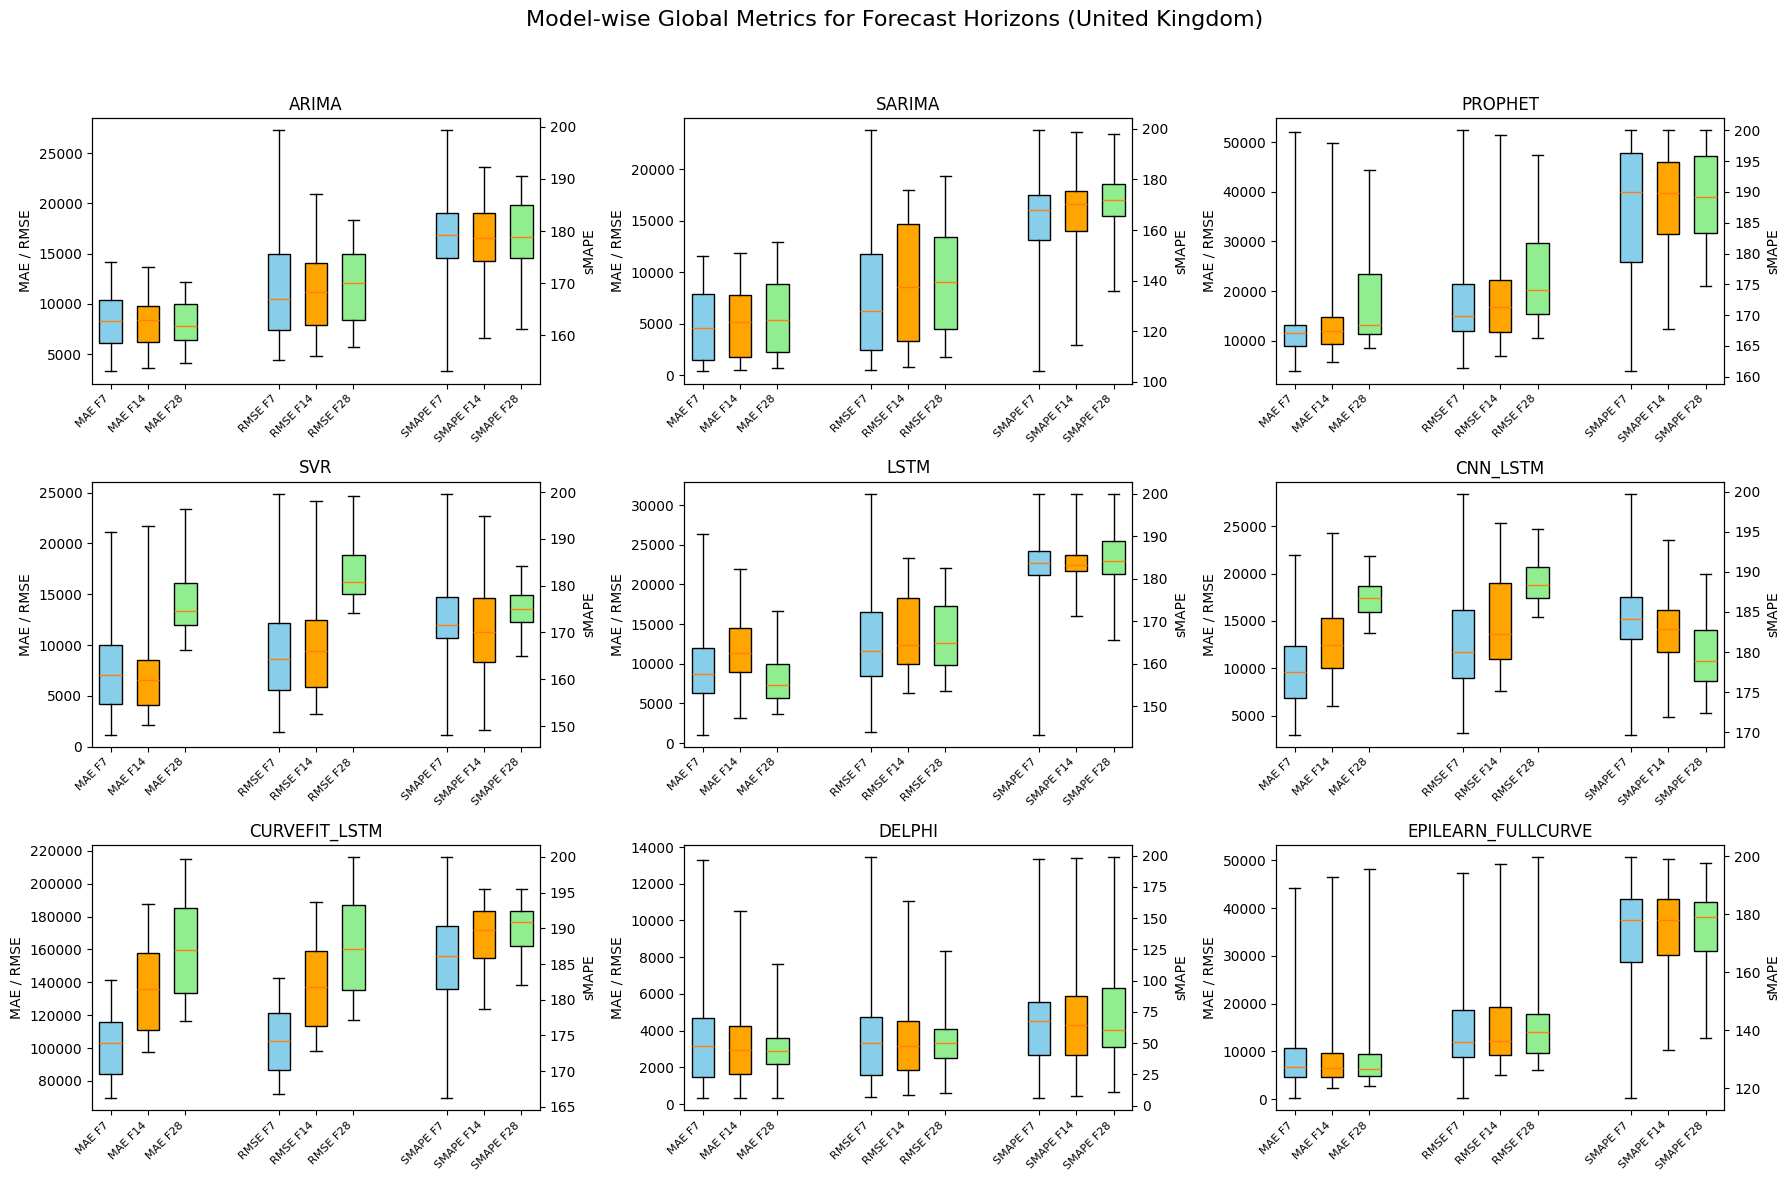

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load data
country = "US"
df = pd.read_csv("global_metrics_box_plot_"+country+".csv")
#df.columns = [col.lower().strip() for col in df.columns]

models = ['ARIMA', 'SARIMA', 'PROPHET', 'SVR', 'LSTM', 'CNN_LSTM', 'CURVEFIT_LSTM', 'DELPHI', 'EPILEARN_FULLCURVE']
metrics = ['MAE', 'RMSE', 'SMAPE']
forecast_horizons = [7, 14, 28]
colors = {7: 'skyblue', 14: 'orange', 28: 'lightgreen'}

# Start plotting
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, model in enumerate(models):
    ax = axes[i]
    ax_smape = ax.twinx()

    box_data = []
    positions = []
    xtick_labels = []
    color_list = []

    pos = 1
    gap = 1.5

    for metric in metrics:
        for f in forecast_horizons:
            try:
                stats = {
                    'med': df[f"{metric}_MEDIAN_{model}_F{f}"].values[0],
                    'q1': df[f"{metric}_P25_{model}_F{f}"].values[0],
                    'q3': df[f"{metric}_P75_{model}_F{f}"].values[0],
                    'whislo': df[f"{metric}_MIN_{model}_F{f}"].values[0],
                    'whishi': df[f"{metric}_MAX_{model}_F{f}"].values[0],
                    'label': f"{metric} F{f}"
                }

                box_data.append(stats)
                positions.append(pos)
                xtick_labels.append(f"{metric.upper()} F{f}")
                color_list.append(colors[f])

                pos += 1
            except KeyError:
                pos += 1
                continue

        pos += gap  # Add space after each metric group

    # Separate sMAPE stats for plotting on right axis
    box_data_mae_rmse = [stat for stat in box_data if not stat['label'].startswith("SMAPE")]
    box_data_smape = [stat for stat in box_data if stat['label'].startswith("SMAPE")]

    # Split positions and colors too
    positions_mae_rmse = positions[:len(box_data_mae_rmse)]
    positions_smape = positions[len(box_data_mae_rmse):]
    colors_mae_rmse = color_list[:len(box_data_mae_rmse)]
    colors_smape = color_list[len(box_data_mae_rmse):]

    # Plot MAE/RMSE
    b1 = ax.bxp(box_data_mae_rmse, positions=positions_mae_rmse, widths=0.6, showfliers=False, patch_artist=True)
    for patch, c in zip(b1['boxes'], colors_mae_rmse):
        patch.set_facecolor(c)

    # Plot SMAPE
    b2 = ax_smape.bxp(box_data_smape, positions=positions_smape, widths=0.6, showfliers=False, patch_artist=True)
    for patch, c in zip(b2['boxes'], colors_smape):
        patch.set_facecolor(c)

    ax.set_title(model, fontsize=12)
    ax.set_ylabel("MAE / RMSE")
    ax_smape.set_ylabel("sMAPE")

    ax.set_xticks(positions)
    ax.set_xticklabels(xtick_labels, rotation=45, ha='right', fontsize=8)

plt.suptitle("Model-wise Global Metrics for Forecast Horizons ("+country+")", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

fig.savefig("global_metrics_box_plot_"+country+".png", dpi=300, bbox_inches='tight')

In [46]:
import pandas as pd
import os
from glob import glob

# Step 1: Define file location and model files
data_dir = "../results"
files = glob(os.path.join(data_dir, "global_metrics_results_*.csv"))

# Step 2: Read and concatenate
all_data = []
for file in files:
    df = pd.read_csv(file)
    model_name = os.path.basename(file).replace("global_metrics_results_", "").replace(".csv", "")
    df["model"] = model_name
    all_data.append(df)

df_all = pd.concat(all_data, ignore_index=True)

# Step 3: Normalize column names
df_all.columns = [col.lower().strip() for col in df_all.columns]

# Step 4: Parameters
F = 7
W = 14
country = 'United Kingdom'
exog_vars_set = ['no_exog', 'death_recovered', 'death_stringency', 'death_mobility', 'death_all']

# Step 5: Define metrics to extract
metrics = ["mae", "rmse", "smape"]
stats = ["median", "p25", "p75", "min", "max"]
metric_cols = [f"{m}_{s}" for m in metrics for s in stats]

# Step 6: Filter by conditions
df_filtered = df_all[
    (df_all["f"] == F) &
    (df_all["country"] == country) &
    (df_all["w"].isnull() | (df_all["w"] == W)) &
    (df_all["exog_vars"].isin(exog_vars_set))
]

if "target_var" in df_filtered.columns:
    df_filtered = df_filtered[df_filtered["target_var"] == "new_cases"]
if "curve_func" in df_filtered.columns:
    df_filtered = df_filtered[(df_filtered["curve_func"].isnull()) | (df_filtered["curve_func"] == "gompertz")]
if "method" in df_filtered.columns:
    df_filtered = df_filtered[(df_filtered["method"].isnull()) | (df_filtered["method"] == "weightedmedian")]

# Step 7: Keep relevant columns
df_metrics = df_filtered[["country", "model", "exog_vars"] + metric_cols]

# Step 8: Melt into long format (optional, if needed for plotting)
df_long = df_metrics.melt(id_vars=["country", "model", "exog_vars"],
                          value_vars=metric_cols,
                          var_name="metric_stat",
                          value_name="value")

# Optional split of metric_stat to two columns
df_long[['metric', 'stat']] = df_long['metric_stat'].str.upper().str.split('_', expand=True)
df_long = df_long.drop(columns='metric_stat')

# Optional save
df_long.to_csv(f"global_metrics_exogvar_boxplot_{country}.csv", index=False)

# Preview result
df_long


,country,model,exog_vars,value,metric,stat
0,United Kingdom,arima,death_all,7770.910565,MAE,MEDIAN
1,United Kingdom,arima,death_mobility,7668.423173,MAE,MEDIAN
2,United Kingdom,arima,death_recovered,8329.789140,MAE,MEDIAN
3,United Kingdom,arima,death_stringency,8353.832487,MAE,MEDIAN
4,United Kingdom,arima,no_exog,8285.850207,MAE,MEDIAN
...,...,...,...,...,...,...
520,United Kingdom,svr,death_all,198.706217,SMAPE,MAX
521,United Kingdom,svr,death_mobility,199.834704,SMAPE,MAX
522,United Kingdom,svr,death_recovered,199.586058,SMAPE,MAX
523,United Kingdom,svr,death_stringency,200.000000,SMAPE,MAX


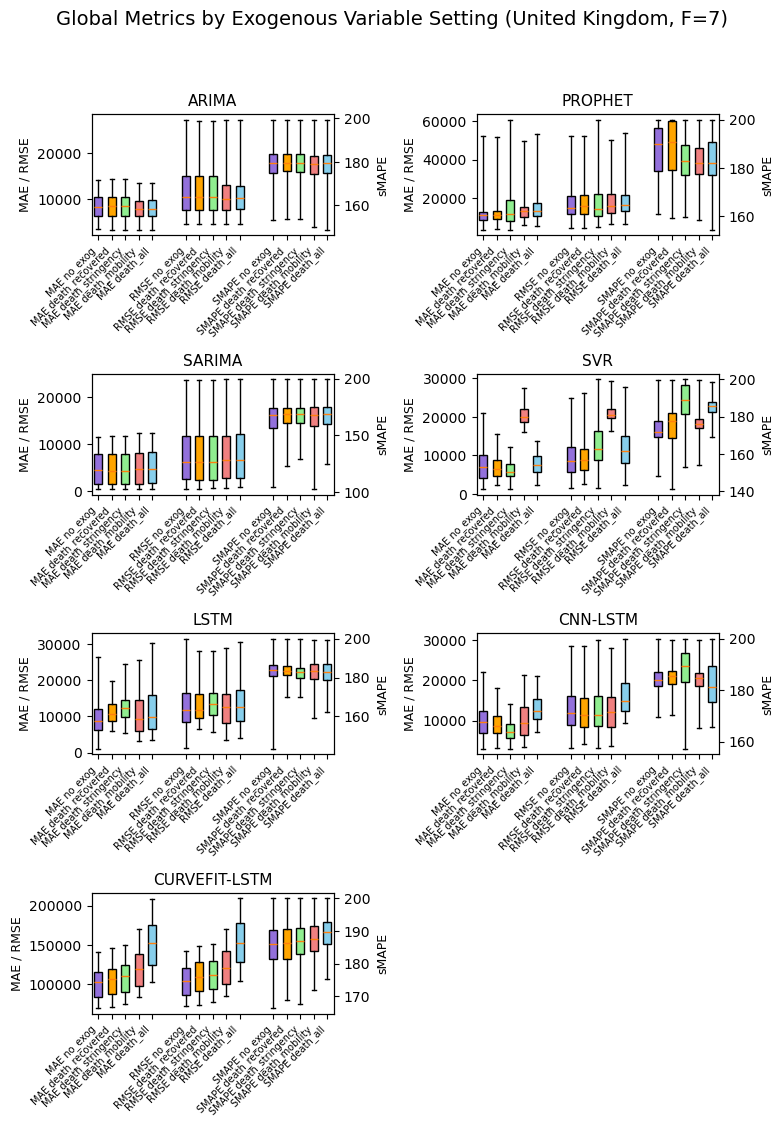

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Load data
# -----------------------------
country = "United Kingdom"
df = pd.read_csv(f"global_metrics_exogvar_boxplot_{country}.csv")

# -----------------------------
# Settings
# -----------------------------
model_keys = ['arima', 'prophet', 'sarima', 'svr', 'lstm', 'cnn_lstm', 'curvefit_lstm']
display_names = {
    'arima': 'ARIMA',
    'prophet': 'PROPHET',
    'sarima': 'SARIMA',
    'svr': 'SVR',
    'lstm': 'LSTM',
    'cnn_lstm': 'CNN-LSTM',
    'curvefit_lstm': 'CURVEFIT-LSTM',
}

metrics = ['MAE', 'RMSE', 'SMAPE']
colors = {
    'no_exog': 'mediumpurple',
    'death_recovered': 'orange',
    'death_stringency': 'lightgreen',
    'death_mobility': 'lightcoral',
    'death_all': 'skyblue',
}
exog_order = list(colors.keys())

# -----------------------------
# Plot: 2x4 on A4 landscape
# -----------------------------
fig, axes = plt.subplots(4, 2, figsize=(8.27,11.69), sharey=False)
axes = axes.flatten()

for ax, model in zip(axes, model_keys):
    df_model = df[df['model'] == model]
    ax_smape = ax.twinx()

    box_data_mae_rmse, box_data_smape = [], []
    positions_mae_rmse, positions_smape = [], []
    colors_mae_rmse, colors_smape = [], []

    pos = 1
    group_gap = 1.5

    for metric in metrics:
        for ev in exog_order:
            df_sub = df_model[(df_model['metric'] == metric) & (df_model['exog_vars'] == ev)]
            stats_dict = df_sub.set_index('stat')['value'].to_dict()

            if {'MEDIAN', 'P25', 'P75', 'MIN', 'MAX'}.issubset(stats_dict):
                entry = {
                    'med': stats_dict['MEDIAN'],
                    'q1': stats_dict['P25'],
                    'q3': stats_dict['P75'],
                    'whislo': stats_dict['MIN'],
                    'whishi': stats_dict['MAX'],
                    'label': f"{metric} {ev}"
                }
                if metric == 'SMAPE':
                    box_data_smape.append(entry)
                    positions_smape.append(pos)
                    colors_smape.append(colors[ev])
                else:
                    box_data_mae_rmse.append(entry)
                    positions_mae_rmse.append(pos)
                    colors_mae_rmse.append(colors[ev])
            pos += 1
        pos += group_gap

    # Draw MAE/RMSE
    if box_data_mae_rmse:
        b1 = ax.bxp(box_data_mae_rmse, positions=positions_mae_rmse, widths=0.6,
                    showfliers=False, patch_artist=True)
        for patch, c in zip(b1['boxes'], colors_mae_rmse):
            patch.set_facecolor(c)

    # Draw SMAPE (right axis)
    if box_data_smape:
        b2 = ax_smape.bxp(box_data_smape, positions=positions_smape, widths=0.6,
                          showfliers=False, patch_artist=True)
        for patch, c in zip(b2['boxes'], colors_smape):
            patch.set_facecolor(c)

    ax.set_title(display_names.get(model, model.upper()), fontsize=11, pad=6)
    ax.set_ylabel("MAE / RMSE", fontsize=9)
    ax_smape.set_ylabel("sMAPE", fontsize=9)

    all_positions = positions_mae_rmse + positions_smape
    all_labels = [e['label'] for e in (box_data_mae_rmse + box_data_smape)]
    if all_positions:
        ax.set_xticks(all_positions)
        ax.set_xticklabels(all_labels, rotation=45, ha='right', fontsize=7)

# Hide the last (unused) subplot so no blank frame is shown
for ax in axes[len(model_keys):]:
    fig.delaxes(ax)

fig.suptitle(f"Global Metrics by Exogenous Variable Setting ({country}, F=7)", fontsize=14, y=0.98)
plt.tight_layout(rect=[0.02, 0.02, 0.98, 0.95])

out_path = f"global_metrics_exogvar_boxplot_{country}_2x4_A4_landscape.png"
fig.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()


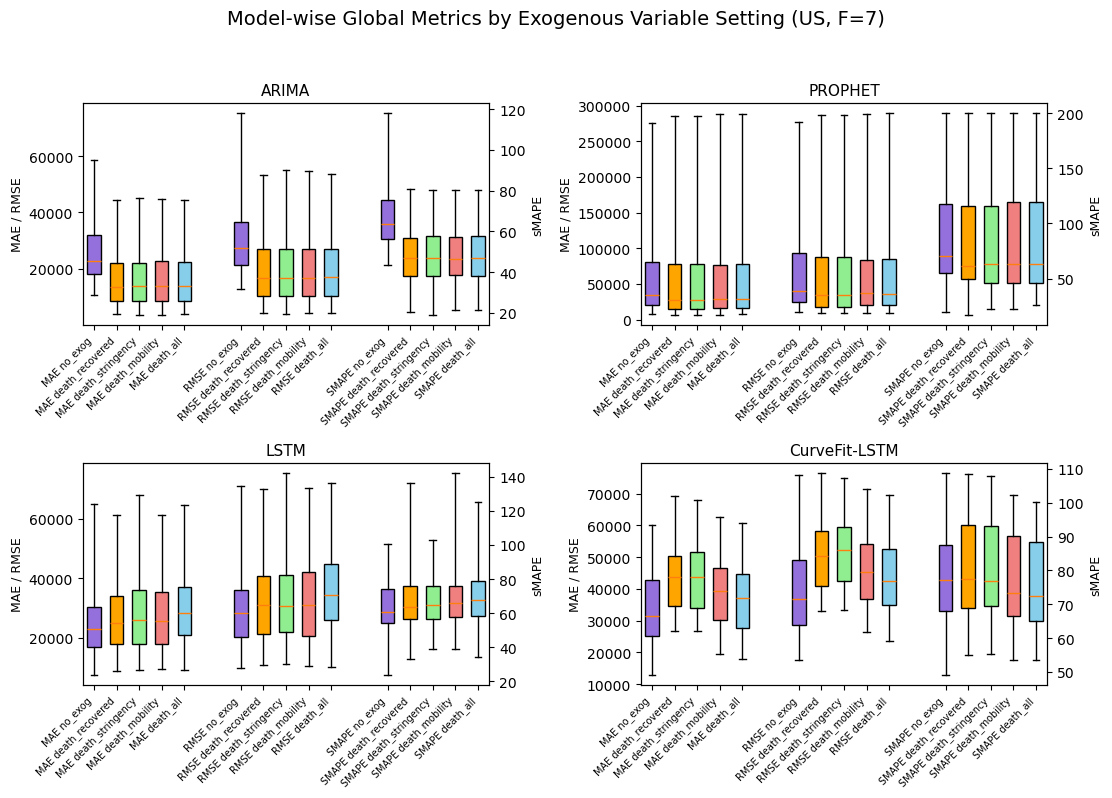

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Load data
# -----------------------------
country = "US"
df = pd.read_csv(f"global_metrics_exogvar_boxplot_{country}.csv")

# -----------------------------
# Settings
# -----------------------------
# Use only the requested models (df keys) and map to DISPLAY NAMES (ALL CAPS)
model_keys = ['arima', 'prophet', 'lstm', 'curvefit_lstm']
display_names = {
    'arima': 'ARIMA',
    'prophet': 'PROPHET',
    'lstm': 'LSTM',
    'curvefit_lstm': 'CurveFit-LSTM',
}

metrics = ['MAE', 'RMSE', 'SMAPE']
colors = {
    'no_exog': 'mediumpurple',
    'death_recovered': 'orange',
    'death_stringency': 'lightgreen',
    'death_mobility': 'lightcoral',
    'death_all': 'skyblue',
}
exog_order = list(colors.keys())

# -----------------------------
# Plot: 2x2 on A4 landscape
# A4 landscape ~ 11.69 x 8.27 inches
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(11.69, 8.27), sharey=False)
axes = axes.flatten()

for ax, model in zip(axes, model_keys):
    df_model = df[df['model'] == model]
    ax_smape = ax.twinx()

    box_data_mae_rmse = []
    box_data_smape = []
    positions_mae_rmse = []
    positions_smape = []
    colors_mae_rmse = []
    colors_smape = []

    pos = 1
    group_gap = 1.5

    for metric in metrics:
        for ev in exog_order:
            df_sub = df_model[(df_model['metric'] == metric) & (df_model['exog_vars'] == ev)]
            stats_dict = df_sub.set_index('stat')['value'].to_dict()

            # Require all five stats for a valid box
            if {'MEDIAN', 'P25', 'P75', 'MIN', 'MAX'}.issubset(stats_dict):
                stat_entry = {
                    'med': stats_dict['MEDIAN'],
                    'q1': stats_dict['P25'],
                    'q3': stats_dict['P75'],
                    'whislo': stats_dict['MIN'],
                    'whishi': stats_dict['MAX'],
                    'label': f"{metric.upper()} {ev}"
                }
                if metric == 'SMAPE':
                    box_data_smape.append(stat_entry)
                    positions_smape.append(pos)
                    colors_smape.append(colors[ev])
                else:
                    box_data_mae_rmse.append(stat_entry)
                    positions_mae_rmse.append(pos)
                    colors_mae_rmse.append(colors[ev])
            pos += 1
        pos += group_gap

    # Draw MAE/RMSE on left y-axis
    if box_data_mae_rmse:
        b1 = ax.bxp(
            box_data_mae_rmse,
            positions=positions_mae_rmse,
            widths=0.6,
            showfliers=False,
            patch_artist=True
        )
        for patch, c in zip(b1['boxes'], colors_mae_rmse):
            patch.set_facecolor(c)

    # Draw SMAPE on right y-axis
    if box_data_smape:
        b2 = ax_smape.bxp(
            box_data_smape,
            positions=positions_smape,
            widths=0.6,
            showfliers=False,
            patch_artist=True
        )
        for patch, c in zip(b2['boxes'], colors_smape):
            patch.set_facecolor(c)

    # Titles in ALL CAPS as requested
    ax.set_title(display_names.get(model, model.upper()), fontsize=11, pad=6)

    # Axis labels
    ax.set_ylabel("MAE / RMSE", fontsize=9)
    ax_smape.set_ylabel("sMAPE", fontsize=9)

    # X ticks
    all_positions = positions_mae_rmse + positions_smape
    all_labels = [entry['label'] for entry in (box_data_mae_rmse + box_data_smape)]
    if all_positions:
        ax.set_xticks(all_positions)
        ax.set_xticklabels(all_labels, rotation=45, ha='right', fontsize=7)

# If fewer than 4 models are drawn (shouldn't happen here), hide extra axes
for i in range(len(model_keys), len(axes)):
    fig.delaxes(axes[i])

fig.suptitle(f"Model-wise Global Metrics by Exogenous Variable Setting ({country}, F=7)", fontsize=14, y=0.98)
plt.tight_layout(rect=[0.02, 0.02, 0.98, 0.95])

# Save & show
out_path = f"global_metrics_exogvar_boxplot_{country}_2x2_A4_landscape.png"
fig.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()


In [25]:
import pandas as pd
import os
from glob import glob

# === Setup ===
global_dir = "../results"
tp_dir = "../results"
country = "United Kingdom"
forecast_horizon = 7
input_window = 14

# === Define metrics to extract ===
global_metrics = [
    "mae_median", "mae_p25", "mae_p75", "mae_min", "mae_max",
    "rmse_median", "rmse_p25", "rmse_p75", "rmse_min", "rmse_max",
    "smape_median", "smape_p25", "smape_p75", "smape_min", "smape_max"
]

tp_metrics = [
    f"alignment_{metric}" for metric in global_metrics
]

# === Load Global Metrics ===
global_files = glob(os.path.join(global_dir, "global_metrics_results_*.csv"))
global_data = []

for file in global_files:
    df = pd.read_csv(file)
    df.columns = [col.lower().strip() for col in df.columns]
    model_name = os.path.basename(file).replace("global_metrics_results_", "").replace(".csv", "")
    df["model"] = model_name
    global_data.append(df)

df_global = pd.concat(global_data, ignore_index=True)

# === Filter Global Metrics ===
df_g = df_global[
    (df_global["country"] == country) &
    (df_global["f"] == forecast_horizon)
]

if "target_var" in df_g.columns:
    df_g = df_g[df_g["target_var"] == "new_cases"]
if "w" in df_g.columns:
    df_g = df_g[(df_g["w"].isnull()) | (df_g["w"] == input_window)]
if "exog_vars" in df_g.columns:
    df_g = df_g[(df_g["exog_vars"].isnull()) | (df_g["exog_vars"] == "no_exog")]
if "curve_func" in df_g.columns:
    df_g = df_g[(df_g["curve_func"].isnull()) | (df_g["curve_func"] == "gompertz")]
if "method" in df_g.columns:
    df_g = df_g[(df_g["method"].isnull()) | (df_g["method"] == "weightedmedian")]

df_g_filtered = df_g[["model"] + global_metrics].copy()
df_g_filtered.columns = ["model"] + [f"global_{col}" for col in global_metrics]

# === Load TP-aware Metrics ===
tp_files = glob(os.path.join(tp_dir, "tp_aware_metrics_results_*.csv"))
tp_data = []

for file in tp_files:
    df = pd.read_csv(file)
    df.columns = [col.lower().strip() for col in df.columns]
    model_name = os.path.basename(file).replace("tp_aware_metrics_results_", "").replace(".csv", "")
    df["model"] = model_name
    tp_data.append(df)

df_tp = pd.concat(tp_data, ignore_index=True)

# === Filter TP-aware Metrics ===
df_tp_filtered = df_tp[
    (df_tp["country"] == country) &
    (df_tp["f"] == forecast_horizon)
]

if "target_var" in df_tp_filtered.columns:
    df_tp_filtered = df_tp_filtered[df_tp_filtered["target_var"] == "new_cases"]
if "w" in df_tp_filtered.columns:
    df_tp_filtered = df_tp_filtered[(df_tp_filtered["w"].isnull()) | (df_tp_filtered["w"] == input_window)]
if "exog_vars" in df_tp_filtered.columns:
    df_tp_filtered = df_tp_filtered[(df_tp_filtered["exog_vars"].isnull()) | (df_tp_filtered["exog_vars"] == "no_exog")]
if "curve_func" in df_tp_filtered.columns:
    df_tp_filtered = df_tp_filtered[(df_tp_filtered["curve_func"].isnull()) | (df_tp_filtered["curve_func"] == "gompertz")]
if "method" in df_tp_filtered.columns:
    df_tp_filtered = df_tp_filtered[(df_tp_filtered["method"].isnull()) | (df_tp_filtered["method"] == "weightedmedian")]

df_tp_filtered = df_tp_filtered[["model"] + tp_metrics].copy()
df_tp_filtered.columns = ["model"] + [f"tp_{col.replace('alignment_', '')}" for col in tp_metrics]


# === Merge Global and TP-aware for Plotting ===
df_merged = pd.merge(df_g_filtered, df_tp_filtered, on="model", how="inner")

# === Save for plotting ===
df_merged.to_csv("global_vs_tpaware_metrics_boxstats_"+country+"_F7.csv", index=False)
df_merged


,model,global_mae_median,global_mae_p25,global_mae_p75,global_mae_min,global_mae_max,global_rmse_median,global_rmse_p25,global_rmse_p75,global_rmse_min,...,tp_rmse_median,tp_rmse_p25,tp_rmse_p75,tp_rmse_min,tp_rmse_max,tp_smape_median,tp_smape_p25,tp_smape_p75,tp_smape_min,tp_smape_max
0,arima,8285.850207,6144.808847,10420.923248,3272.095176,14220.868374,10445.924556,7446.804740,14930.424557,4388.155456,...,7672.220970,6729.244004,10454.857648,4388.155456,19205.197295,178.920904,176.921046,180.864676,165.086337,199.322800
1,cnn_lstm,9578.098458,6860.705967,12376.207694,2969.508615,21957.559012,11759.555267,8980.554647,16182.371467,3117.210891,...,9573.528187,7088.564454,11296.122686,3117.210891,23996.695570,185.043126,182.812549,188.167272,178.028133,199.738775
2,curvefit_lstm,103271.412141,83993.019713,115567.187710,69515.267909,141412.237706,104546.827487,86910.785057,121515.536488,72091.486233,...,102969.607690,82108.363739,125397.383986,76656.904698,136347.594999,189.431423,184.296694,194.177845,173.473671,199.974500
3,delphi,3179.663764,1465.777018,4679.728569,337.187735,13287.689651,3315.922832,1604.481857,4740.977109,387.296547,...,3984.178104,2610.764821,4904.692272,944.157539,8803.163183,75.248866,62.955641,82.913578,18.208281,194.653340
4,epilearn_fullcurve,6642.151586,4660.321576,10612.394180,187.294228,44167.326568,11940.364422,8853.329874,18596.913926,210.581174,...,9633.192851,7049.361002,14451.511121,210.581174,38902.745975,180.066321,173.121505,186.702340,116.672217,199.728183
5,lstm,8757.393590,6251.285034,11976.633597,1041.954643,26378.921038,11661.292402,8468.719810,16546.223734,1357.357195,...,8925.153005,7553.300880,11839.469802,1357.357195,24007.182298,184.785389,182.001814,187.602144,166.877201,200.000000
6,prophet,11482.025340,9050.163883,13181.982312,3830.251413,52021.582844,15065.267581,11915.716960,21393.458982,4452.526207,...,13458.851473,9582.392261,21402.480970,6259.958998,52348.620367,193.595886,185.028538,199.401529,160.838867,200.000000
7,sarima,4586.634223,1484.044939,7857.310271,367.082615,11626.412731,6241.295127,2489.645192,11746.591200,513.891741,...,2523.506466,1396.689619,11695.536395,513.891741,15167.679993,168.069560,148.648316,174.728901,104.104680,199.261857
8,svr,7013.949872,4206.403612,10032.792359,1165.671506,21083.920905,8640.167685,5556.564240,12193.692768,1474.675083,...,8464.333370,3697.869033,12260.488487,1474.675083,17517.715925,172.772014,169.218910,176.394147,154.888760,199.656436


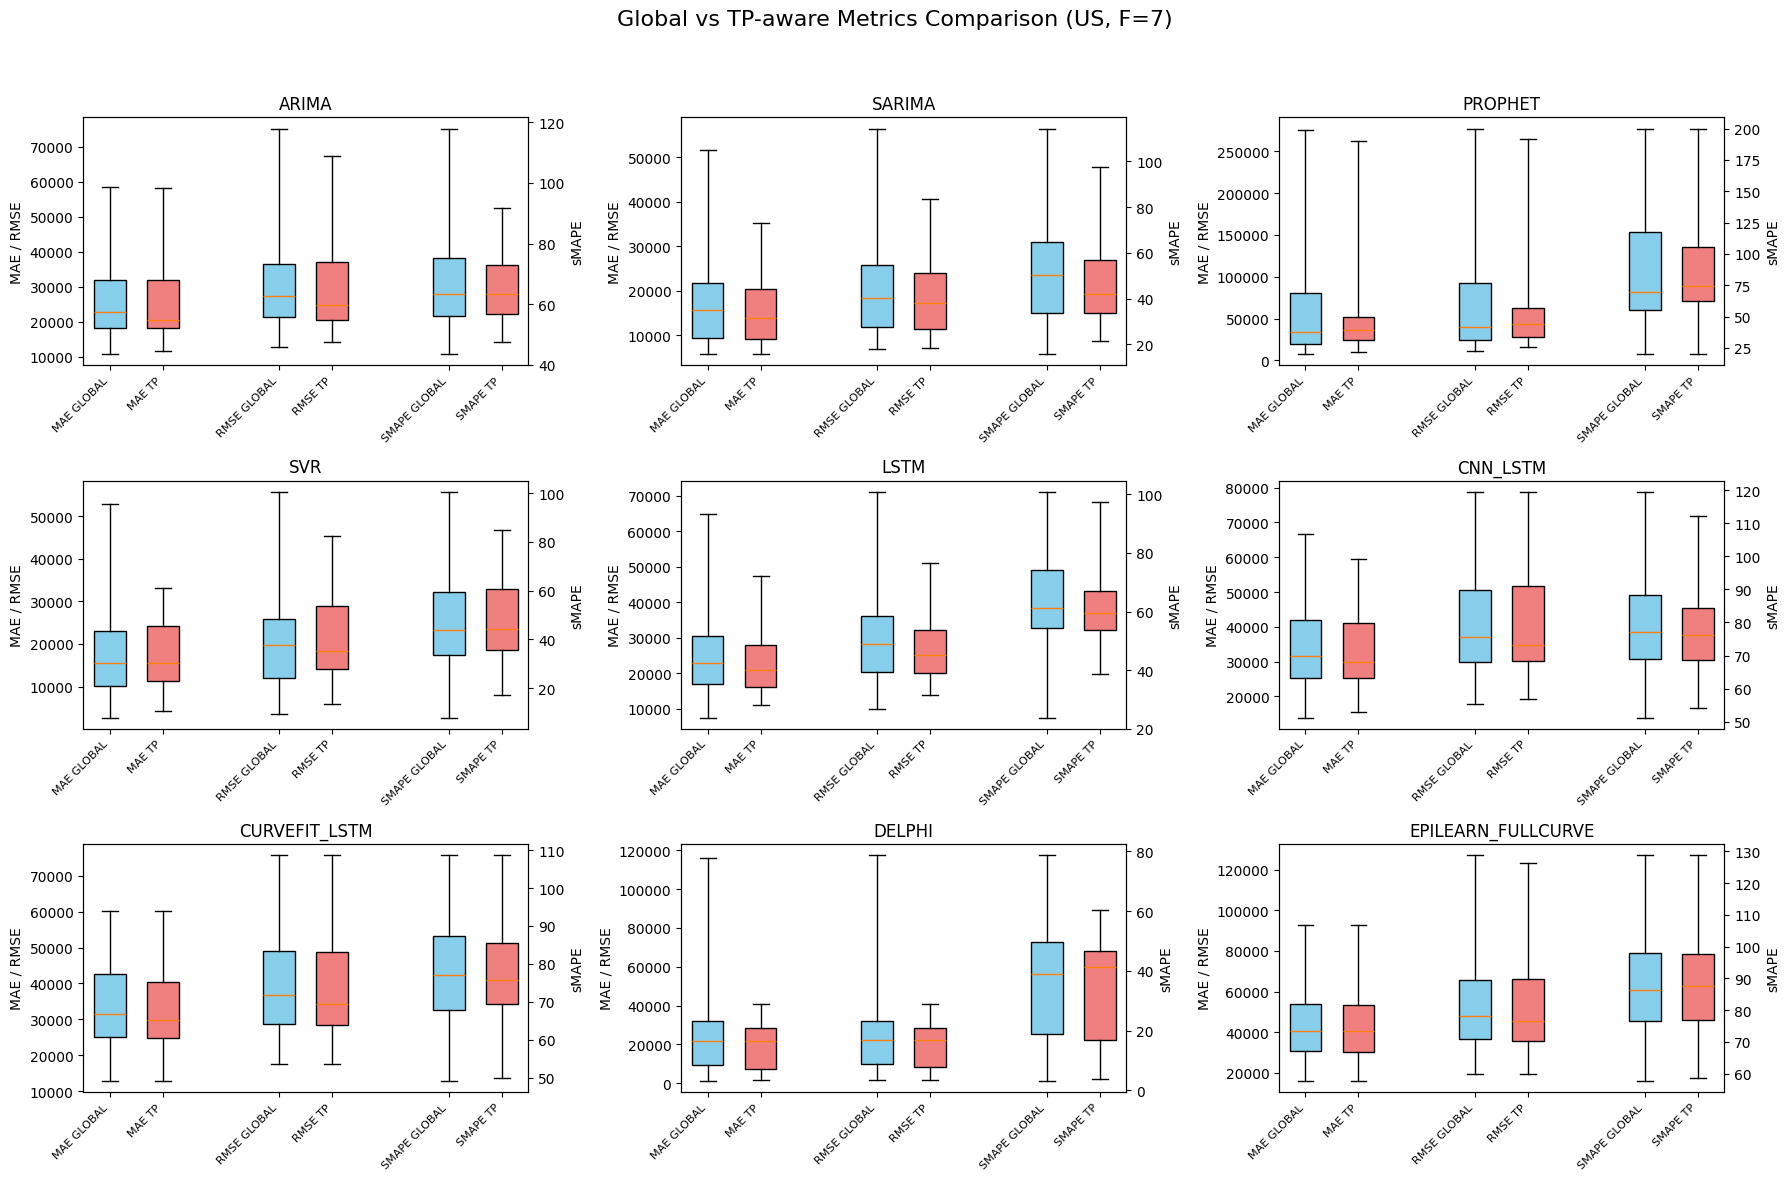

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged stats file
country = "US"
df = pd.read_csv("global_vs_tpaware_metrics_boxstats_"+country+"_F7.csv")

models = ['ARIMA', 'SARIMA', 'PROPHET', 'SVR', 'LSTM', 'CNN_LSTM', 'CURVEFIT_LSTM', 'DELPHI', 'EPILEARN_FULLCURVE']
metrics = ['MAE', 'RMSE', 'SMAPE']
colors = {'global': 'skyblue', 'tp': 'lightcoral'}

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, model in enumerate(models):
    ax = axes[i]
    ax_smape = ax.twinx()

    box_data = []
    positions = []
    xtick_labels = []
    color_list = []

    pos = 1
    gap = 1.2

    for metric in metrics:
        for source in ['global', 'tp']:
            metric_prefix = 'tp_' if source == 'tp' else 'global_'
            df_model = df[(df['model'].str.lower() == model.lower())]

            try:
                stats = {
                    'med': df_model[f"{metric_prefix}{metric.lower()}_median"].values[0],
                    'q1': df_model[f"{metric_prefix}{metric.lower()}_p25"].values[0],
                    'q3': df_model[f"{metric_prefix}{metric.lower()}_p75"].values[0],
                    'whislo': df_model[f"{metric_prefix}{metric.lower()}_min"].values[0],
                    'whishi': df_model[f"{metric_prefix}{metric.lower()}_max"].values[0],
                    'label': f"{metric}_{source}"
                }

                box_data.append(stats)
                positions.append(pos)
                xtick_labels.append(f"{metric.upper()} {source.upper()}")
                color_list.append(colors[source])

                pos += 1
            except KeyError:
                pos += 1
                continue


        pos += gap  # Add space between metrics

    # Split sMAPE metrics
    box_data_mae_rmse = [stat for stat in box_data if not stat['label'].startswith("SMAPE")]
    box_data_smape = [stat for stat in box_data if stat['label'].startswith("SMAPE")]

    positions_mae_rmse = positions[:len(box_data_mae_rmse)]
    positions_smape = positions[len(box_data_mae_rmse):]
    colors_mae_rmse = color_list[:len(box_data_mae_rmse)]
    colors_smape = color_list[len(box_data_mae_rmse):]

    # MAE and RMSE (left y-axis)
    b1 = ax.bxp(box_data_mae_rmse, positions=positions_mae_rmse, widths=0.6, showfliers=False, patch_artist=True)
    for patch, c in zip(b1['boxes'], colors_mae_rmse):
        patch.set_facecolor(c)

    # sMAPE (right y-axis)
    b2 = ax_smape.bxp(box_data_smape, positions=positions_smape, widths=0.6, showfliers=False, patch_artist=True)
    for patch, c in zip(b2['boxes'], colors_smape):
        patch.set_facecolor(c)

    ax.set_title(model, fontsize=12)
    ax.set_ylabel("MAE / RMSE")
    ax_smape.set_ylabel("sMAPE")

    ax.set_xticks(positions)
    ax.set_xticklabels(xtick_labels, rotation=45, ha='right', fontsize=8)

plt.suptitle("Global vs TP-aware Metrics Comparison ("+country+", F=7)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

fig.savefig("global_vs_tpaware_metrics_boxplots_"+country+"_F7.png", dpi=300, bbox_inches='tight')


In [9]:
import pandas as pd
import os

# === Setup ===
model_name = "epilearn_fullcurve"  # Change this to any model you want to extract
forecast_horizon = 7
input_window = 14
global_file = f"../results/global_metrics_results_{model_name}.csv"
tp_file = f"../results/tp_aware_metrics_results_{model_name}.csv"

# === Define metrics to extract ===
global_metrics = ["sMAPE_mean","MAE_mean","RMSE_mean"]

tp_metrics = [f"alignment_{metric}" for metric in global_metrics]

# === Load and filter Global Metrics ===
df_g = pd.read_csv(global_file)
df_g.columns = [col.lower().strip() for col in df_g.columns]
df_g = df_g[df_g["f"] == forecast_horizon]

if "target_var" in df_g.columns:
    df_g = df_g[df_g["target_var"] == "new_cases"]
if "w" in df_g.columns:
    df_g = df_g[(df_g["w"].isnull()) | (df_g["w"] == input_window)]
if "exog_vars" in df_g.columns:
    df_g = df_g[(df_g["exog_vars"].isnull()) | (df_g["exog_vars"] == "no_exog")]
if "curve_func" in df_g.columns:
    df_g = df_g[(df_g["curve_func"].isnull()) | (df_g["curve_func"] == "gompertz")]
if "method" in df_g.columns:
    df_g = df_g[(df_g["method"].isnull()) | (df_g["method"] == "weightedmedian")]

df_g_filtered = df_g[["country"] + global_metrics].copy()
df_g_filtered.columns = ["country"] + [f"global_{col}" for col in global_metrics]

# === Load and filter TP-aware Metrics ===
df_tp = pd.read_csv(tp_file)
df_tp.columns = [col.lower().strip() for col in df_tp.columns]
df_tp = df_tp[df_tp["f"] == forecast_horizon]

if "target_var" in df_tp.columns:
    df_tp = df_tp[df_tp["target_var"] == "new_cases"]
if "w" in df_tp.columns:
    df_tp = df_tp[(df_tp["w"].isnull()) | (df_tp["w"] == input_window)]
if "exog_vars" in df_tp.columns:
    df_tp = df_tp[(df_tp["exog_vars"].isnull()) | (df_tp["exog_vars"] == "no_exog")]
if "curve_func" in df_tp.columns:
    df_tp = df_tp[(df_tp["curve_func"].isnull()) | (df_tp["curve_func"] == "gompertz")]
if "method" in df_tp.columns:
    df_tp = df_tp[(df_tp["method"].isnull()) | (df_tp["method"] == "weightedmedian")]

df_tp_filtered = df_tp[["country"] + tp_metrics].copy()
df_tp_filtered.columns = ["country"] + [f"tp_{col.replace('alignment_', '')}" for col in tp_metrics]

# === Merge on country ===
df_merged = pd.merge(df_g_filtered, df_tp_filtered, on="country", how="inner")

# === Save for plotting ===
df_merged.to_csv(f"global_vs_tpaware_boxstats_{model_name}_F{forecast_horizon}.csv", index=False)
print(df_merged.head())


     country  global_mae_median  global_mae_p25  global_mae_p75  \
0  Australia        7650.399735     5237.061223    11933.436062   
1     Brazil       12852.911994     7937.899965    25876.257435   
2      China        5609.903226     2042.762943    14409.323345   
3    Germany       81427.203498    40832.435545   114520.540508   
4      India         377.303322       70.772733     1459.698253   

   global_mae_min  global_mae_max  global_rmse_median  global_rmse_p25  \
0     2572.513424    45154.602224        10921.461173      8615.327660   
1     4704.624186    67825.316153        16263.510717     10242.786652   
2        1.053927    43062.085670         7234.043402      2415.116534   
3    10005.540647   406941.082695       126992.943973     61451.364258   
4       32.619751     7848.029544          514.782068        93.355831   

   global_rmse_p75  global_rmse_min  ...  tp_rmse_median   tp_rmse_p25  \
0     20392.770956      5227.547005  ...    11331.978812   8542.481623   
1   

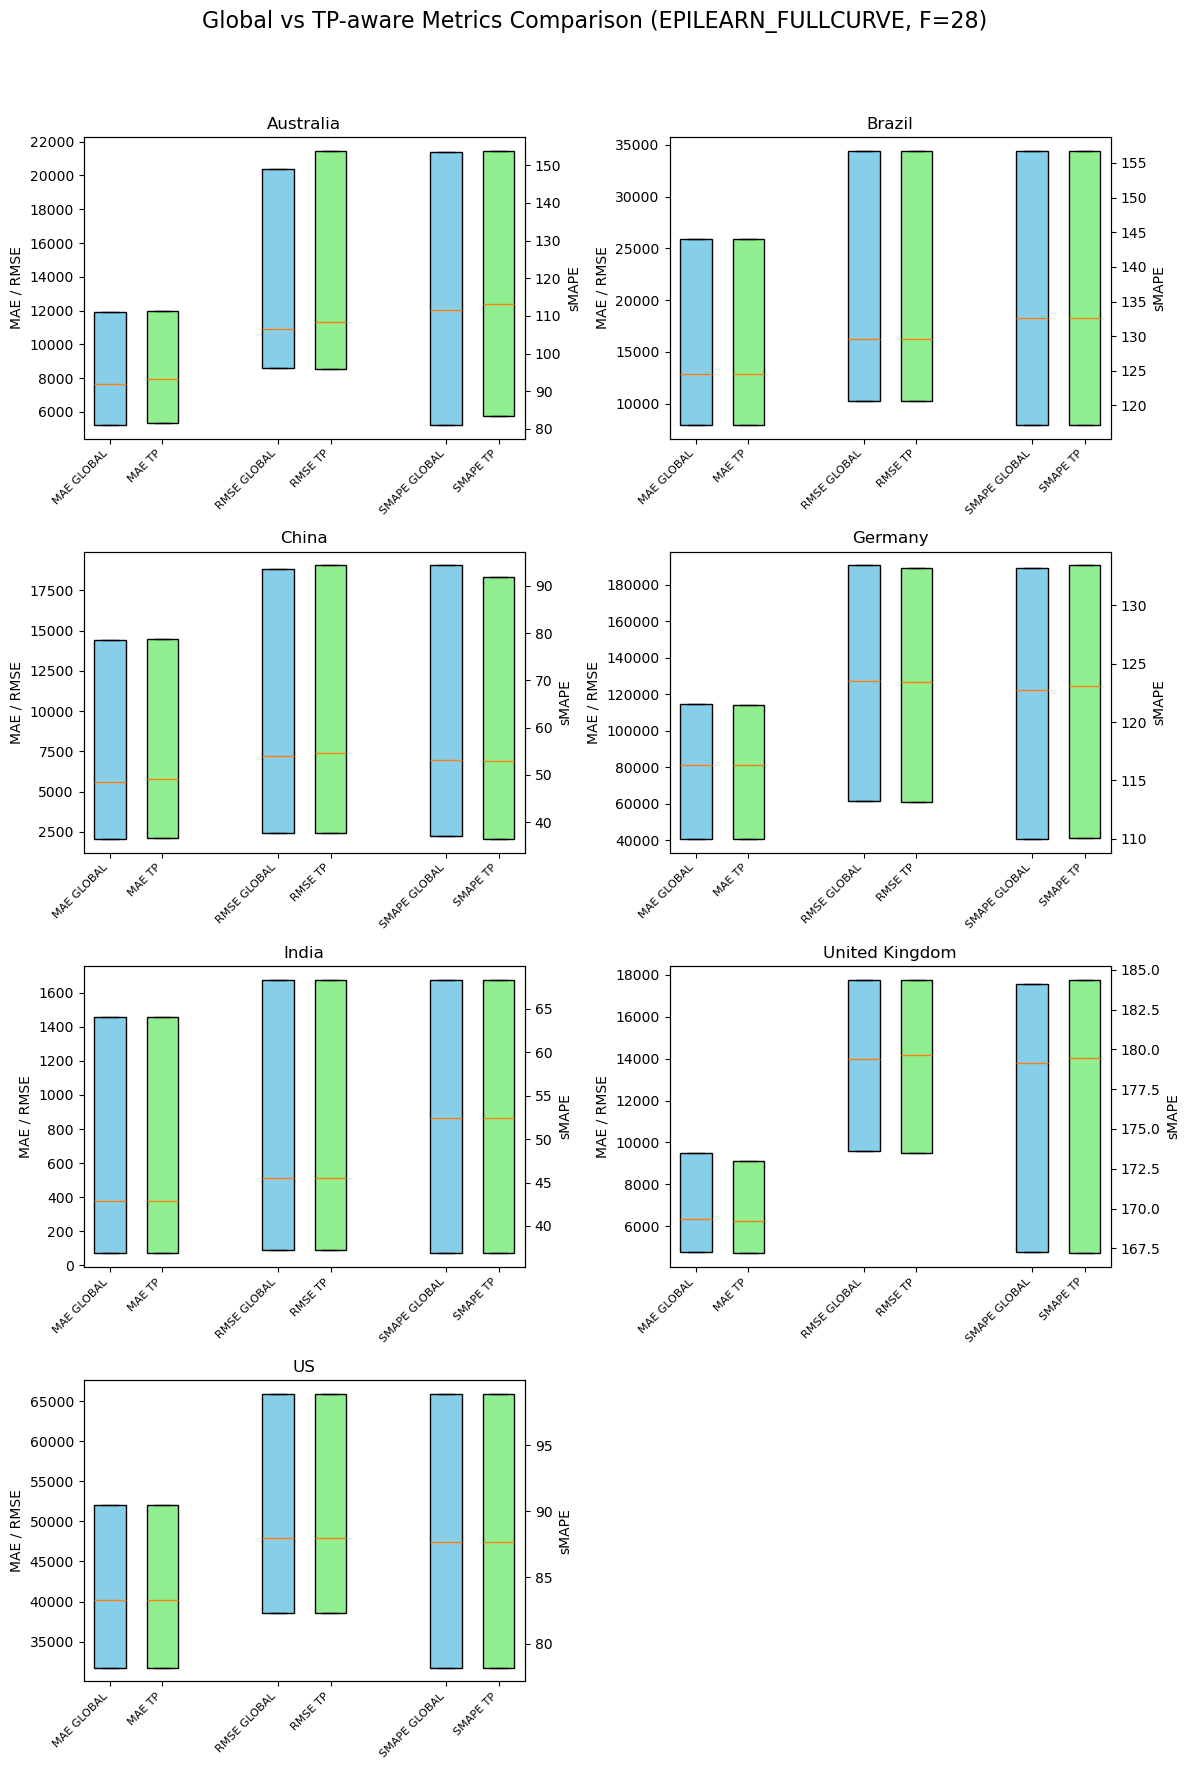

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# === Parameters ===
model_name = "epilearn_fullcurve"  # Change this to the model you are plotting
forecast_horizon = 28
metrics = ['MAE', 'RMSE', 'SMAPE']
colors = {'global': 'skyblue', 'tp': 'lightgreen'}

# === Load Data ===
df = pd.read_csv(f"global_vs_tpaware_boxstats_{model_name}_F{forecast_horizon}.csv")
df.columns = [col.lower().strip() for col in df.columns]
countries = df["country"].tolist()

# === Plotting ===
fig, axes = plt.subplots(4, 2, figsize=(12, 18))
axes = axes.flatten()

for i, country in enumerate(countries[:7]):  # Limit to 9 countries for 3x3 grid
    ax = axes[i]
    ax_smape = ax.twinx()

    box_data = []
    positions = []
    xtick_labels = []
    color_list = []

    pos = 1
    gap = 1.2

    df_row = df[df["country"] == country]

    for metric in metrics:
        for source in ['global', 'tp']:
            prefix = f"{source}_{metric.lower()}"

            try:
                stats = {
                    'med': df_row[f"{prefix}_median"].values[0],
                    'q1': df_row[f"{prefix}_p25"].values[0],
                    'q3': df_row[f"{prefix}_p75"].values[0],
                    #'whislo': df_row[f"{prefix}_min"].values[0],
                    #'whishi': df_row[f"{prefix}_max"].values[0],
                    'whislo': df_row[f"{prefix}_p25"].values[0],  # no lower whisker
                    'whishi': df_row[f"{prefix}_p75"].values[0],  # no upper whisker
                    'label': f"{metric}_{source}"
                }

                box_data.append(stats)
                positions.append(pos)
                xtick_labels.append(f"{metric.upper()} {source.upper()}")
                color_list.append(colors[source])

                pos += 1
            except KeyError:
                pos += 1
                continue

        pos += gap

    # Split sMAPE metrics
    box_data_mae_rmse = [stat for stat in box_data if not stat['label'].startswith("SMAPE")]
    box_data_smape = [stat for stat in box_data if stat['label'].startswith("SMAPE")]

    positions_mae_rmse = positions[:len(box_data_mae_rmse)]
    positions_smape = positions[len(box_data_mae_rmse):]
    colors_mae_rmse = color_list[:len(box_data_mae_rmse)]
    colors_smape = color_list[len(box_data_mae_rmse):]

    # Plot MAE and RMSE (left y-axis)
    b1 = ax.bxp(box_data_mae_rmse, positions=positions_mae_rmse, widths=0.6, showfliers=False, patch_artist=True)
    for patch, c in zip(b1['boxes'], colors_mae_rmse):
        patch.set_facecolor(c)

    # Plot sMAPE (right y-axis)
    b2 = ax_smape.bxp(box_data_smape, positions=positions_smape, widths=0.6, showfliers=False, patch_artist=True)
    for patch, c in zip(b2['boxes'], colors_smape):
        patch.set_facecolor(c)

    ax.set_title(country, fontsize=12)
    ax.set_ylabel("MAE / RMSE")
    ax_smape.set_ylabel("sMAPE")

    ax.set_xticks(positions)
    ax.set_xticklabels(xtick_labels, rotation=45, ha='right', fontsize=8)

    # Hide unused subplot(s)
    if len(countries) < len(axes):
        for j in range(len(countries), len(axes)):
            axes[j].axis("off")


plt.suptitle(f"Global vs TP-aware Metrics Comparison ({model_name.upper()}, F={forecast_horizon})", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f"global_vs_tpaware_boxplots_{model_name}_F{forecast_horizon}.png", dpi=300, bbox_inches='tight')
plt.show()


In [4]:
import pandas as pd
import os
import re
from glob import glob

# === Settings ===
results_dir = "../results"
forecast_horizon = 7
input_window = 14  # used only when column 'w' exists

# === Metrics to extract ===
# === Define metrics to extract ===
global_metrics = ["smape_mean","mae_mean","rmse_mean"]

tp_metrics = [f"alignment_{metric}" for metric in global_metrics]

# === Find all model result file pairs ===
global_files = glob(os.path.join(results_dir, "global_metrics_results_*.csv"))

def model_name_from_global(path: str) -> str:
    # Extract model name from: global_metrics_results_<model>.csv
    m = re.search(r"global_metrics_results_(.+)\.csv$", os.path.basename(path))
    return m.group(1) if m else None

pairs = []
for gfile in global_files:
    mname = model_name_from_global(gfile)
    if not mname:
        continue
    tpfile = os.path.join(results_dir, f"tp_aware_metrics_results_{mname}.csv")
    if os.path.exists(tpfile):
        pairs.append((mname, gfile, tpfile))

if not pairs:
    raise FileNotFoundError("No matching pairs of global/TP files found in ../results.")

rows = []

for model_name, global_file, tp_file in pairs:
    # --- Load & filter Global ---
    df_g = pd.read_csv(global_file)
    df_g.columns = [c.lower().strip() for c in df_g.columns]

    # Required horizon
    if "f" in df_g.columns:
        df_g = df_g[df_g["f"] == forecast_horizon]

    # Target variable
    if "target_var" in df_g.columns:
        df_g = df_g[df_g["target_var"] == "new_cases"]

    # Input window (only if present)
    if "w" in df_g.columns:
        df_g = df_g[(df_g["w"].isnull()) | (df_g["w"] == input_window)]

    # Exogenous vars (only if present) — keep 'no_exog' for fair cross-model compare
    if "exog_vars" in df_g.columns:
        df_g = df_g[(df_g["exog_vars"].isnull()) | (df_g["exog_vars"] == "no_exog")]

    # Curve function (if present)
    if "curve_func" in df_g.columns:
        df_g = df_g[(df_g["curve_func"].isnull()) | (df_g["curve_func"] == "gompertz")]

    # Method (if present; e.g., EpiLearn aggregation)
    if "method" in df_g.columns:
        df_g = df_g[(df_g["method"].isnull()) | (df_g["method"] == "weightedmedian")]

    # Keep columns if they exist
    keep_g_cols = ["country"] + [m for m in global_metrics if m in df_g.columns]
    if not set(["country"]).issubset(df_g.columns) or len(keep_g_cols) == 1:
        # Skip if required columns are missing
        continue
    df_gf = df_g[keep_g_cols].copy()
    df_gf = df_gf.rename(columns={m: f"global_{m}" for m in global_metrics if m in df_gf.columns})

    # --- Load & filter TP-aware ---
    df_tp = pd.read_csv(tp_file)
    df_tp.columns = [c.lower().strip() for c in df_tp.columns]

    if "f" in df_tp.columns:
        df_tp = df_tp[df_tp["f"] == forecast_horizon]
    if "target_var" in df_tp.columns:
        df_tp = df_tp[df_tp["target_var"] == "new_cases"]
    if "w" in df_tp.columns:
        df_tp = df_tp[(df_tp["w"].isnull()) | (df_tp["w"] == input_window)]
    if "exog_vars" in df_tp.columns:
        df_tp = df_tp[(df_tp["exog_vars"].isnull()) | (df_tp["exog_vars"] == "no_exog")]
    if "curve_func" in df_tp.columns:
        df_tp = df_tp[(df_tp["curve_func"].isnull()) | (df_tp["curve_func"] == "gompertz")]
    if "method" in df_tp.columns:
        df_tp = df_tp[(df_tp["method"].isnull()) | (df_tp["method"] == "weightedmedian")]

    keep_tp_cols = ["country"] + [m for m in tp_metrics if m in df_tp.columns]
    if not set(["country"]).issubset(df_tp.columns) or len(keep_tp_cols) == 1:
        continue
    df_tpf = df_tp[keep_tp_cols].copy()
    # Strip the 'alignment_' prefix and add tp_ prefix
    rename_tp = {m: f"tp_{m.replace('alignment_', '')}" for m in tp_metrics if m in df_tpf.columns}
    df_tpf = df_tpf.rename(columns=rename_tp)

    # --- Merge and tag model ---
    df_m = pd.merge(df_gf, df_tpf, on="country", how="inner")
    if df_m.empty:
        continue
    df_m.insert(1, "model", model_name)
    rows.append(df_m)

# === Concatenate all models ===
merged_df = pd.concat(rows, ignore_index=True) if rows else pd.DataFrame()

# === Save ===
out_path = os.path.join(results_dir, f"global_vs_tpaware_boxstats_ALLMODELS_F{forecast_horizon}.csv")
merged_df.to_csv(out_path, index=False)
print(f"Saved: {out_path}")
print(merged_df.head())


Saved: ../results\global_vs_tpaware_boxstats_ALLMODELS_F7.csv
     country  model  global_smape_mean  global_mae_mean  global_rmse_mean  \
0  Australia  arima         110.742841      8918.615474      12718.422900   
1     Brazil  arima         124.765596     13571.483997      16515.840524   
2      China  arima          43.987440      5238.803088       6204.008339   
3    Germany  arima          78.060662     12009.644627      14951.793950   
4      India  arima          78.000531      1163.010776       1354.225981   

   tp_smape_mean   tp_mae_mean  tp_rmse_mean  
0     127.029832   9647.003777  14289.078307  
1     127.427981  14764.509038  17660.643434  
2      46.900194   4754.463161   5698.387345  
3      72.591766  11191.213353  14354.873224  
4      79.146049   1270.976603   1575.153542  


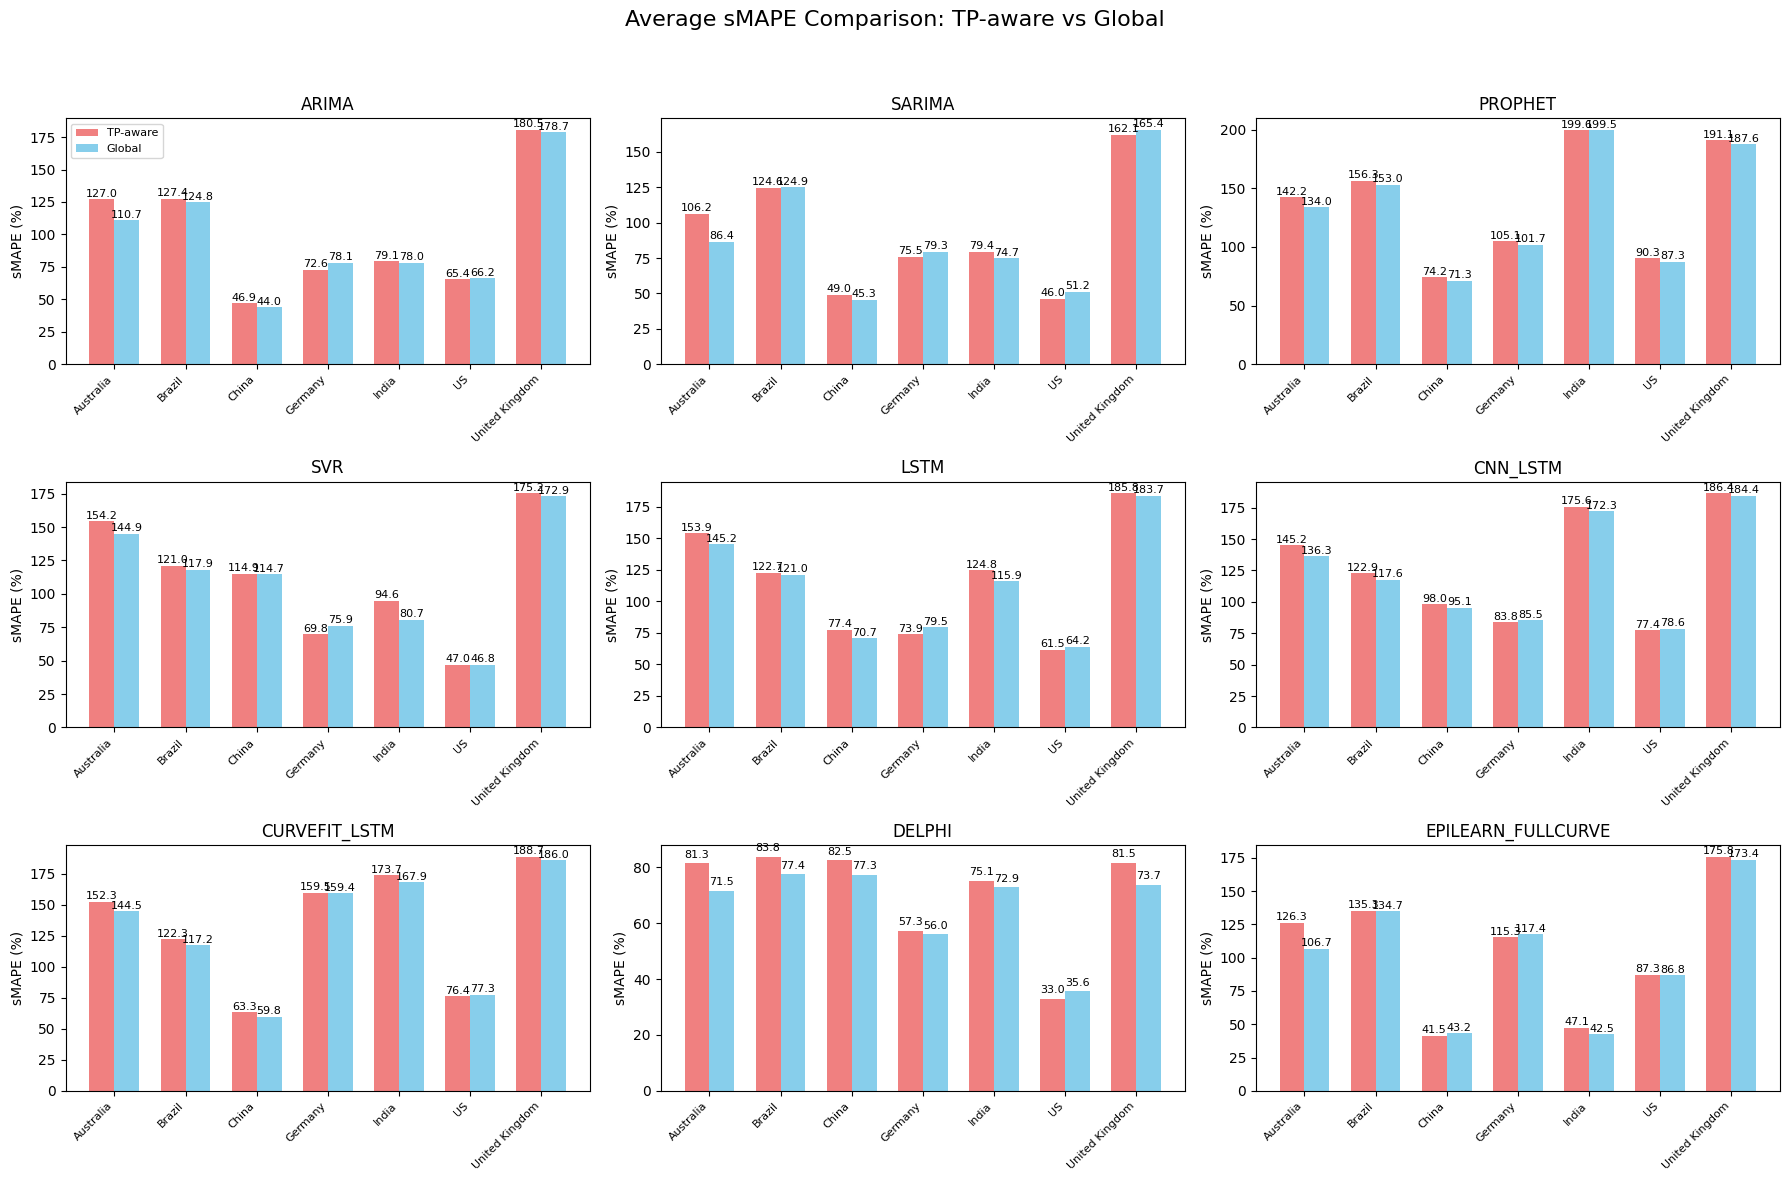

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# === Assumes merged_df exists with columns:
# ['country','model','global_smape_mean','tp_smape_mean', ...]
# Models expected:
models_order = ['arima', 'sarima', 'prophet', 'svr', 'lstm', 'cnn_lstm', 'curvefit_lstm', 'delphi', 'epilearn_fullcurve']

# Use a consistent country order across subplots
countries = sorted(merged_df['country'].unique().tolist())

# === Plotting ===
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, model in enumerate(models_order):
    ax = axes[i]

    # Filter data for this model and align by countries
    df_m = merged_df[merged_df['model'] == model].copy()
    if df_m.empty:
        ax.set_title(model.upper())
        ax.axis("off")
        continue

    # Build arrays aligned to the global country order
    df_m = df_m.set_index('country').reindex(countries)
    gl_means = df_m['global_smape_mean'].to_numpy()
    tp_means = df_m['tp_smape_mean'].to_numpy()

    # Replace NaNs (if any) with 0 for plotting; keep labels blank for NaNs
    gl_means_plot = np.nan_to_num(gl_means, nan=0.0)
    tp_means_plot = np.nan_to_num(tp_means, nan=0.0)

    x = np.arange(len(countries))
    width = 0.35

    bars1 = ax.bar(x - width/2, tp_means_plot, width, label='TP-aware', color='lightcoral')
    bars2 = ax.bar(x + width/2, gl_means_plot, width, label='Global', color='skyblue')

    # Labels above bars (skip if value was NaN originally)
    for idx in range(len(countries)):
        if not np.isnan(tp_means[idx]):
            ax.text(x[idx] - width/2, tp_means_plot[idx] + 2, f"{tp_means[idx]:.1f}", ha='center', fontsize=8)
        if not np.isnan(gl_means[idx]):
            ax.text(x[idx] + width/2, gl_means_plot[idx] + 2, f"{gl_means[idx]:.1f}", ha='center', fontsize=8)

    ax.set_title(model.upper())
    ax.set_xticks(x)
    ax.set_xticklabels(countries, rotation=45, ha='right', fontsize=8)
    ax.set_ylabel("sMAPE (%)")
    if i == 0:
        ax.legend(fontsize=8)

# Hide unused subplots if any
for j in range(len(models_order), len(axes)):
    axes[j].axis("off")

plt.suptitle("TP-align window sMAPE vs Global sMAPE", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [74]:
import pandas as pd
import os
from glob import glob

# === Parameters ===
folder = "../results"  # change to your folder path if needed
forecast_length = 7
input_window = 14
exog_filter = "no_exog"
metric_cols = ["tp_diff_percentage", "global_diff_percentage"]

# === Collect and Process Files ===
files = glob(os.path.join(folder, "tp_aware_metrics_results_*.csv"))
results = {}

for file in files:
    model_name = os.path.basename(file).replace("tp_aware_metrics_results_", "").replace(".csv", "")
    df = pd.read_csv(file)
    df.columns = [col.strip().lower() for col in df.columns]
    df = df[df["f"] == forecast_length]

    if "target_var" in df.columns:
        df = df[df["target_var"] == "new_cases"]
    if "w" in df_g.columns:
        df = df[(df["w"].isnull()) | (df["w"] == input_window)]
    if "exog_vars" in df.columns:
        df = df[(df["exog_vars"].isnull()) | (df["exog_vars"] == "no_exog")]
    if "curve_func" in df.columns:
        df = df[(df["curve_func"].isnull()) | (df["curve_func"] == "gompertz")]
    if "method" in df.columns:
        df = df[(df["method"].isnull()) | (df["method"] == "weightedmedian")]

    # Only keep country and metric cols
    if 'country' not in df.columns:
        continue

    df_model = df[['country'] + metric_cols].copy()
    df_model.columns = ['country'] + [f"{model_name}_{col}" for col in metric_cols]
    results[model_name] = df_model

# === Merge All Model DataFrames on 'country' ===
merged_df = None
for model_df in results.values():
    if merged_df is None:
        merged_df = model_df
    else:
        merged_df = pd.merge(merged_df, model_df, on='country', how='outer')

# === Reorder Columns: For each model, show TP then Global ===
ordered_columns = ['country']
for model in sorted(results.keys()):
    ordered_columns.append(f"{model}_tp_diff_percentage")
    ordered_columns.append(f"{model}_global_diff_percentage")
merged_df = merged_df[ordered_columns]

merged_df

,country,arima_tp_diff_percentage,arima_global_diff_percentage,cnn_lstm_tp_diff_percentage,cnn_lstm_global_diff_percentage,curvefit_lstm_tp_diff_percentage,curvefit_lstm_global_diff_percentage,delphi_tp_diff_percentage,delphi_global_diff_percentage,epilearn_fullcurve_tp_diff_percentage,epilearn_fullcurve_global_diff_percentage,lstm_tp_diff_percentage,lstm_global_diff_percentage,prophet_tp_diff_percentage,prophet_global_diff_percentage,sarima_tp_diff_percentage,sarima_global_diff_percentage,svr_tp_diff_percentage,svr_global_diff_percentage
0,Australia,17.86,10.34,25.00,14.94,21.43,10.92,18.60,10.85,19.64,11.49,37.50,30.46,33.93,25.86,44.64,37.36,41.07,32.18
1,Brazil,16.67,15.52,4.55,3.45,15.38,11.49,10.00,5.43,43.08,40.23,24.24,23.56,43.94,34.48,25.76,22.41,28.79,22.99
2,China,2.38,4.60,21.43,6.32,28.57,9.20,25.81,11.36,11.90,2.87,26.19,8.05,16.67,8.05,2.38,4.60,2.38,0.57
3,Germany,42.86,33.33,18.37,5.17,38.78,31.61,43.90,25.71,53.06,48.28,46.94,33.91,38.78,27.59,46.94,31.61,46.94,34.48
4,India,14.89,12.07,44.68,55.75,27.08,15.52,28.57,12.00,4.17,1.72,57.45,67.82,29.79,29.89,27.66,18.97,17.02,19.54
5,US,26.98,25.86,38.10,18.39,34.92,17.82,12.00,12.88,42.86,28.16,41.27,39.08,39.68,32.76,39.68,37.93,44.44,40.80
6,United Kingdom,42.86,33.91,26.19,14.37,42.86,41.95,30.30,19.29,21.43,10.34,23.81,14.94,47.62,41.38,45.24,42.53,57.14,44.25


In [25]:
import pandas as pd
import os
from glob import glob
import ast

# === Parameters ===
folder = "../results"  # change if needed
forecast_length = 7
input_window = 14
exog_filter = "no_exog"
metric_cols = ["tp_slope_diff_stats", "global_slope_diff_stats"]

# === Collect and Process Files ===
files = glob(os.path.join(folder, "tp_aware_metrics_results_*.csv"))
results = {}

for file in files:
    model_name = os.path.basename(file).replace("tp_aware_metrics_results_", "").replace(".csv", "")
    df = pd.read_csv(file)
    df.columns = [col.strip().lower() for col in df.columns]
    df = df[df["f"] == forecast_length]

    if "target_var" in df.columns:
        df = df[df["target_var"] == "new_cases"]
    if "w" in df.columns:
        df = df[(df["w"].isnull()) | (df["w"] == input_window)]
    if "exog_vars" in df.columns:
        df = df[(df["exog_vars"].isnull()) | (df["exog_vars"] == exog_filter)]
    if "curve_func" in df.columns:
        df = df[(df["curve_func"].isnull()) | (df["curve_func"] == "gompertz")]
    if "method" in df.columns:
        df = df[(df["method"].isnull()) | (df["method"] == "weightedmedian")]

    if 'country' not in df.columns:
        continue

    records = []
    for _, row in df.iterrows():
        try:
            tp_stats = ast.literal_eval(row["tp_slope_diff_stats"])
            gl_stats = ast.literal_eval(row["global_slope_diff_stats"])
            records.append({
                "country": row["country"],
                f"{model_name}_tp_slope_diff_mean": tp_stats[0],
                f"{model_name}_tp_slope_diff_median": tp_stats[1],
                f"{model_name}_tp_slope_diff_p25": tp_stats[2],
                f"{model_name}_tp_slope_diff_p75": tp_stats[3],
                f"{model_name}_tp_slope_diff_std": tp_stats[4],
                f"{model_name}_global_slope_diff_mean": gl_stats[0],
                f"{model_name}_global_slope_diff_median": gl_stats[1],
                f"{model_name}_global_slope_diff_p25": gl_stats[2],
                f"{model_name}_global_slope_diff_p75": gl_stats[3],
                f"{model_name}_global_slope_diff_std": gl_stats[4],
            })
        except Exception as e:
            continue  # skip malformed rows

    df_model = pd.DataFrame(records)
    results[model_name] = df_model

# === Merge All Model DataFrames on 'country' ===
merged_df = None
for model_df in results.values():
    if merged_df is None:
        merged_df = model_df
    else:
        merged_df = pd.merge(merged_df, model_df, on='country', how='outer')

merged_df

 

,country,arima_tp_slope_diff_mean,arima_tp_slope_diff_median,arima_tp_slope_diff_p25,arima_tp_slope_diff_p75,arima_tp_slope_diff_std,arima_global_slope_diff_mean,arima_global_slope_diff_median,arima_global_slope_diff_p25,arima_global_slope_diff_p75,...,svr_tp_slope_diff_mean,svr_tp_slope_diff_median,svr_tp_slope_diff_p25,svr_tp_slope_diff_p75,svr_tp_slope_diff_std,svr_global_slope_diff_mean,svr_global_slope_diff_median,svr_global_slope_diff_p25,svr_global_slope_diff_p75,svr_global_slope_diff_std
0,Australia,28.073992,0.168939,0.064998,4.787881,57.769738,17.356743,0.094933,0.042071,0.927509,...,72.843887,7.183611,0.361304,178.258865,83.657467,57.785752,1.090629,0.151462,177.972207,81.850904
1,Brazil,29.320330,0.187676,0.059310,1.633671,64.221273,27.506202,0.135451,0.024822,1.016478,...,51.121504,0.225421,0.047013,176.700004,79.507052,40.929249,0.170999,0.031160,2.003803,74.205077
2,China,4.849955,0.186858,0.046767,0.612347,24.586902,7.990368,0.051304,0.013353,0.187370,...,4.044611,0.113860,0.041079,0.538524,19.283239,1.344936,0.043491,0.015522,0.108527,10.051680
3,Germany,76.786931,0.661768,0.102033,179.324920,88.285655,59.713665,0.154127,0.029986,179.304849,...,84.152520,1.471558,0.160836,179.366108,89.057639,62.050479,0.158685,0.024102,179.457921,85.077797
4,India,32.204059,6.584825,0.482181,17.468209,58.438491,23.319400,1.237983,0.260277,12.238779,...,28.534019,1.098385,0.159601,21.125337,50.933093,30.735572,1.135463,0.239333,34.203534,51.536678
5,US,49.029259,0.266585,0.049006,178.824717,79.337200,46.801628,0.128745,0.029573,178.210915,...,80.264763,1.102959,0.104460,179.588813,88.755115,73.610792,0.434353,0.045228,179.738427,88.059961
6,United Kingdom,78.944509,5.925617,0.617067,176.872600,85.545384,60.508434,0.757432,0.124939,175.761533,...,100.565013,173.503824,1.249273,178.799905,85.991837,79.183822,1.448728,0.206438,178.811575,87.670609


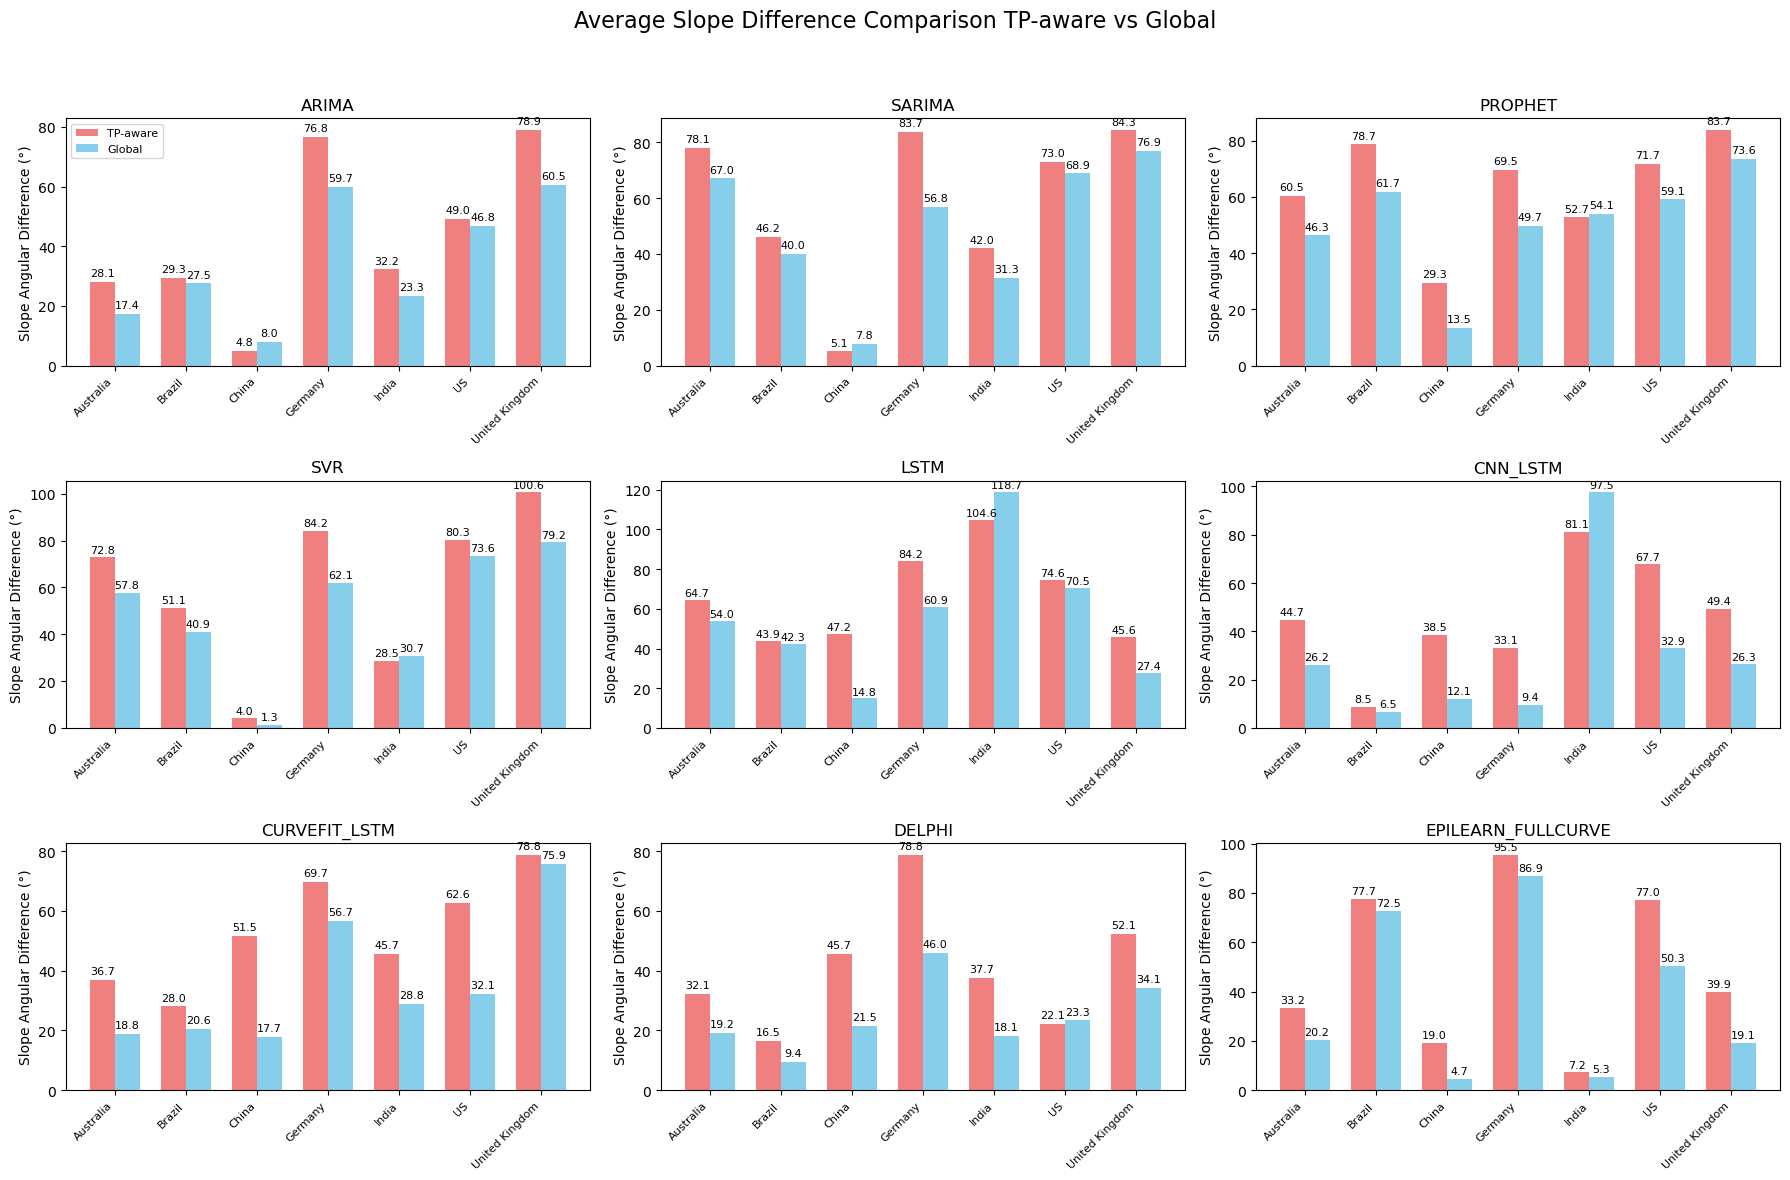

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# === Parameters ===
models_order = ['arima', 'sarima', 'prophet', 'svr', 'lstm', 'cnn_lstm', 'curvefit_lstm', 'delphi', 'epilearn_fullcurve']
countries = merged_df['country'].tolist()
#countries = ["Australia","Brazil","Germany","US","United Kingdom"]
#merged_df = merged_df[merged_df["country"].isin(countries)]

# === Plotting ===
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, model in enumerate(models_order):
    ax = axes[i]

    try:
        tp_means = merged_df[f"{model}_tp_slope_diff_mean"].values
        tp_stds = merged_df[f"{model}_tp_slope_diff_std"].values
        gl_means = merged_df[f"{model}_global_slope_diff_mean"].values
        gl_stds = merged_df[f"{model}_global_slope_diff_std"].values
    except KeyError:
        print(f"Model {model} missing in DataFrame. Skipping.")
        continue

    x = np.arange(len(countries))
    width = 0.35

    #bars1 = ax.bar(x - width/2, tp_means, width, yerr=tp_stds, capsize=5, label='TP-aware', color='lightcoral')
    #bars2 = ax.bar(x + width/2, gl_means, width, yerr=gl_stds, capsize=5, label='Global', color='skyblue')
    bars1 = ax.bar(x - width/2, tp_means, width, capsize=5, label='TP-aware', color='lightcoral')
    bars2 = ax.bar(x + width/2, gl_means, width, capsize=5, label='Global', color='skyblue')

    # Place labels just above the bar height (not above the error bar)
    for idx in range(len(countries)):
        ax.text(x[idx] - width/2, tp_means[idx] + 2, f"{tp_means[idx]:.1f}", ha='center', fontsize=8)
        ax.text(x[idx] + width/2, gl_means[idx] + 2, f"{gl_means[idx]:.1f}", ha='center', fontsize=8)

    ax.set_title(model.upper())
    ax.set_xticks(x)
    ax.set_xticklabels(countries, rotation=45, ha='right', fontsize=8)
    ax.set_ylabel("Slope Angular Difference (°)")
    if i == 0:
        ax.legend(fontsize=8)

# Hide unused subplots if any
for j in range(len(models_order), len(axes)):
    axes[j].axis("off")

plt.suptitle("Average Slope Difference Comparison TP-aware vs Global", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [29]:
fig.savefig("tp_vs_global_slope_angle_diff_barplot.png", dpi=300, bbox_inches='tight')

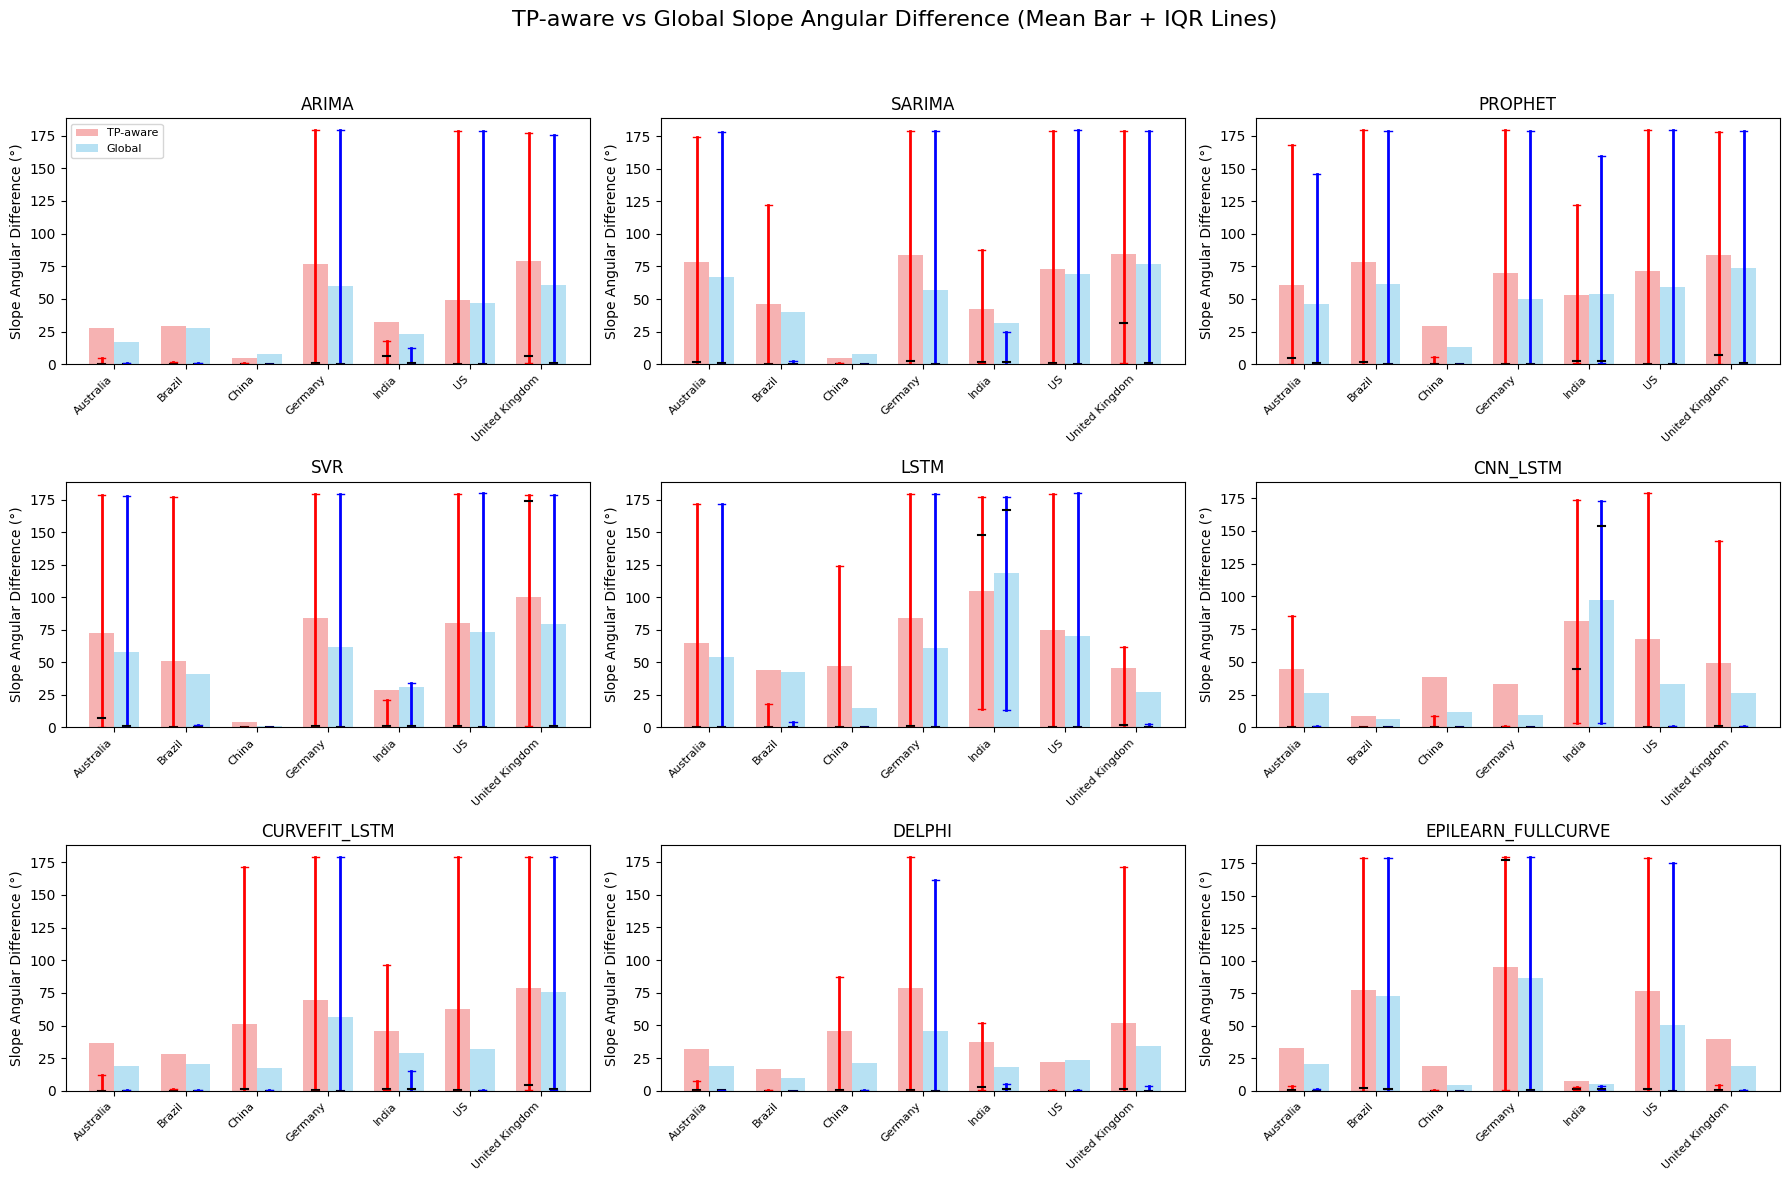

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# === Parameters ===
models_order = ['arima', 'sarima', 'prophet', 'svr', 'lstm', 'cnn_lstm', 'curvefit_lstm', 'delphi', 'epilearn_fullcurve']
countries = merged_df['country'].tolist()

# === Plotting ===
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, model in enumerate(models_order):
    ax = axes[i]

    try:
        tp_mean = merged_df[f"{model}_tp_slope_diff_mean"].values
        tp_med = merged_df[f"{model}_tp_slope_diff_median"].values
        tp_p25 = merged_df[f"{model}_tp_slope_diff_p25"].values
        tp_p75 = merged_df[f"{model}_tp_slope_diff_p75"].values

        gl_mean = merged_df[f"{model}_global_slope_diff_mean"].values
        gl_med = merged_df[f"{model}_global_slope_diff_median"].values
        gl_p25 = merged_df[f"{model}_global_slope_diff_p25"].values
        gl_p75 = merged_df[f"{model}_global_slope_diff_p75"].values
    except KeyError:
        print(f"Model {model} missing stats. Skipping.")
        continue

    x = np.arange(len(countries))
    width = 0.35

    # Bar plots for MEAN
    ax.bar(x - width/2, tp_mean, width, color='lightcoral', alpha=0.6, label='TP-aware')
    ax.bar(x + width/2, gl_mean, width, color='skyblue', alpha=0.6, label='Global')

    # Overlay IQR + median as short ticks
    for idx in range(len(countries)):
        # TP-aware IQR
        ax.plot([x[idx] - width/2, x[idx] - width/2], [tp_p25[idx], tp_p75[idx]], color='red', linewidth=2)
        ax.plot([x[idx] - width/2 - 0.05, x[idx] - width/2 + 0.05], [tp_med[idx], tp_med[idx]], color='black', linewidth=1.5)
        ax.plot([x[idx] - width/2 - 0.05, x[idx] - width/2 + 0.05], [tp_p25[idx], tp_p25[idx]], color='red', linewidth=1)
        ax.plot([x[idx] - width/2 - 0.05, x[idx] - width/2 + 0.05], [tp_p75[idx], tp_p75[idx]], color='red', linewidth=1)

        # Global IQR
        ax.plot([x[idx] + width/2, x[idx] + width/2], [gl_p25[idx], gl_p75[idx]], color='blue', linewidth=2)
        ax.plot([x[idx] + width/2 - 0.05, x[idx] + width/2 + 0.05], [gl_med[idx], gl_med[idx]], color='black', linewidth=1.5)
        ax.plot([x[idx] + width/2 - 0.05, x[idx] + width/2 + 0.05], [gl_p25[idx], gl_p25[idx]], color='blue', linewidth=1)
        ax.plot([x[idx] + width/2 - 0.05, x[idx] + width/2 + 0.05], [gl_p75[idx], gl_p75[idx]], color='blue', linewidth=1)

    ax.set_title(model.upper())
    ax.set_xticks(x)
    ax.set_xticklabels(countries, rotation=45, ha='right', fontsize=8)
    ax.set_ylabel("Slope Angular Difference (°)")
    if i == 0:
        ax.legend(fontsize=8)

# Hide any extra subplots
for j in range(len(models_order), len(axes)):
    axes[j].axis("off")

plt.suptitle("TP-aware vs Global Slope Angular Difference (Mean Bar + IQR Lines)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [2]:
import pandas as pd
import os
from glob import glob

# === Parameters ===
folder = "../results"  # change if needed
forecast_length = 7
input_window = 14
exog_filter = "no_exog"

metric_cols = [
    "lead_lag_unmatched_rate",
    "lead_lag_within_halff_ratio",
    "lead_lag_mean",
    "lead_lag_std",
    "lead_lag_median"
    # add "global_lead_lag_mean", etc. if you want global as well
]

# === Collect and Process Files ===
files = glob(os.path.join(folder, "tp_aware_metrics_results_*.csv"))
results = {}

for file in files:
    model_name = os.path.basename(file).replace("tp_aware_metrics_results_", "").replace(".csv", "")
    df = pd.read_csv(file)
    df.columns = [col.strip().lower() for col in df.columns]
    df = df[df["f"] == forecast_length]

    if "target_var" in df.columns:
        df = df[df["target_var"] == "new_cases"]
    if "w" in df.columns:
        df = df[(df["w"].isnull()) | (df["w"] == input_window)]
    if "exog_vars" in df.columns:
        df = df[(df["exog_vars"].isnull()) | (df["exog_vars"] == exog_filter)]
    if "curve_func" in df.columns:
        df = df[(df["curve_func"].isnull()) | (df["curve_func"] == "gompertz")]
    if "method" in df.columns:
        df = df[(df["method"].isnull()) | (df["method"] == "weightedmedian")]

    if 'country' not in df.columns:
        continue

    # Only keep the necessary columns, prefix with model name
    keep_cols = ['country'] + metric_cols
    df_model = df[keep_cols].copy()
    df_model.columns = ['country'] + [f"{model_name}_{col}" for col in metric_cols]
    results[model_name] = df_model

# === Merge All Model DataFrames on 'country' ===
merged_df = None
for model_df in results.values():
    if merged_df is None:
        merged_df = model_df
    else:
        merged_df = pd.merge(merged_df, model_df, on='country', how='outer')

merged_df


,country,arima_lead_lag_unmatched_rate,arima_lead_lag_within_halff_ratio,arima_lead_lag_mean,arima_lead_lag_std,arima_lead_lag_median,cnn_lstm_lead_lag_unmatched_rate,cnn_lstm_lead_lag_within_halff_ratio,cnn_lstm_lead_lag_mean,cnn_lstm_lead_lag_std,...,sarima_lead_lag_unmatched_rate,sarima_lead_lag_within_halff_ratio,sarima_lead_lag_mean,sarima_lead_lag_std,sarima_lead_lag_median,svr_lead_lag_unmatched_rate,svr_lead_lag_within_halff_ratio,svr_lead_lag_mean,svr_lead_lag_std,svr_lead_lag_median
0,Australia,0.625000,0.281250,1.708333,1.756458,1.0,0.687500,0.187500,3.150000,1.348488,...,0.671875,0.265625,2.047619,1.745743,3.0,0.671875,0.296875,2.238095,1.044259,2.0
1,Brazil,0.651515,0.303030,1.173913,1.722899,0.0,0.863636,0.106061,2.555556,1.013794,...,0.606061,0.378788,1.423077,1.270372,1.0,0.772727,0.227273,1.733333,1.162919,2.0
2,China,0.428571,0.571429,0.916667,0.906327,1.0,0.523810,0.476190,1.066667,1.048261,...,0.460317,0.539683,0.970588,0.904041,1.0,0.571429,0.428571,1.074074,1.035000,1.0
3,Germany,0.446429,0.517857,0.645161,1.112007,0.0,0.696429,0.267857,1.294118,1.759428,...,0.321429,0.642857,1.184211,1.352780,1.0,0.303571,0.642857,0.846154,1.267788,0.0
4,India,0.704918,0.262295,1.611111,1.334558,1.0,0.508197,0.459016,1.933333,1.172481,...,0.721311,0.229508,1.529412,1.419403,1.0,0.901639,0.065574,2.166667,2.136976,2.0
5,US,0.587302,0.317460,2.230769,1.680659,2.0,0.507937,0.317460,2.677419,1.777397,...,0.714286,0.190476,3.055556,1.661757,3.0,0.634921,0.301587,1.956522,1.296087,2.0
6,United Kingdom,0.673469,0.265306,0.937500,1.730848,0.0,0.693878,0.244898,1.533333,2.133631,...,0.551020,0.408163,0.727273,1.579084,0.0,0.775510,0.183673,1.818182,1.778661,2.0


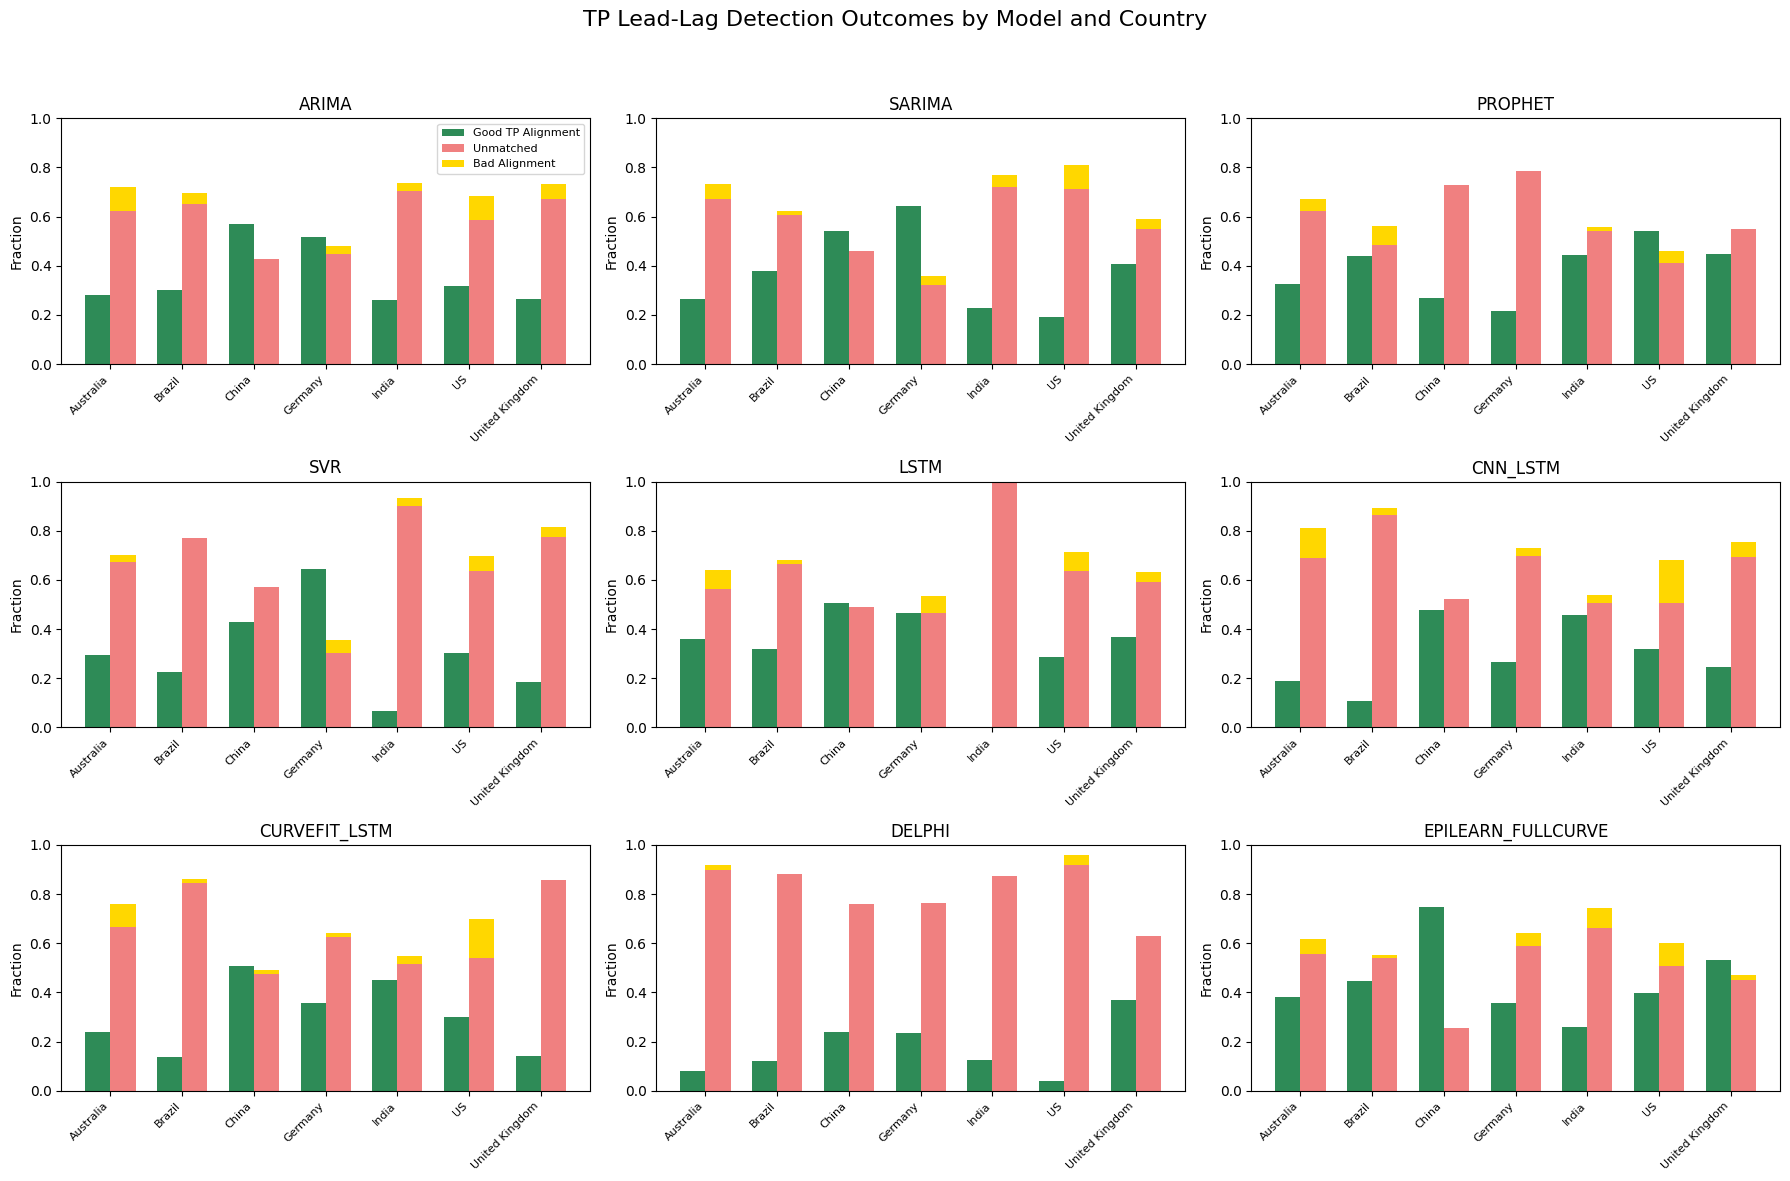

In [3]:
import matplotlib.pyplot as plt
import numpy as np

models_order = ['arima', 'sarima', 'prophet', 'svr', 'lstm', 'cnn_lstm', 'curvefit_lstm', 'delphi', 'epilearn_fullcurve']
countries = merged_df['country'].tolist()

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, model in enumerate(models_order):
    ax = axes[i]
    within_halfF = merged_df[f"{model}_lead_lag_within_halff_ratio"].values
    unmatched = merged_df[f"{model}_lead_lag_unmatched_rate"].values
    bad = 1 - within_halfF - unmatched
    total_stack = 1 - within_halfF

    x = np.arange(len(countries))
    width = 0.35

    # "Good" bar (left for each country group)
    bars1 = ax.bar(x - width/2, within_halfF, width, color='seagreen', label='Good TP Alignment')

    # Stacked bar (right for each country group)
    bars2_bottom = ax.bar(x + width/2, unmatched, width, color='lightcoral', label='Unmatched')
    bars2_top = ax.bar(x + width/2, bad, width, bottom=unmatched, color='gold', label='Bad Alignment')

    ax.set_title(model.upper())
    ax.set_xticks(x)
    ax.set_xticklabels(countries, rotation=45, ha='right', fontsize=8)
    ax.set_ylim(0, 1)
    ax.set_ylabel("Fraction")
    if i == 0:
        # Only show unique labels in legend
        handles, labels = ax.get_legend_handles_labels()
        unique = dict(zip(labels, handles))
        ax.legend(unique.values(), unique.keys(), fontsize=8, loc='upper right')

# Hide unused subplots if any
for j in range(len(models_order), len(axes)):
    axes[j].axis("off")

plt.suptitle("TP Lead-Lag Detection Outcomes by Model and Country", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [4]:
fig.savefig("tp_alignment_lead_lag_barplot.png", dpi=300, bbox_inches='tight')

In [31]:

import numpy as np
import pandas as pd
from scipy.stats import wilcoxon, binomtest

# If you already have merged_df in memory, comment the next line.
# merged_df = pd.read_csv("/mnt/data/global_vs_tpaware_boxstats_ALLMODELS_F7.csv")

csv_path = "../results/global_vs_tpaware_boxstats_ALLMODELS_F7.csv"
merged_df = pd.read_csv(csv_path)

# --- Helpers ---------------------------------------------------------------

def paired_permutation_test(x, y, n_perm=100000, seed=0, stat='median'):
    """
    Two-sided paired permutation (sign-flip) test on differences d = x - y.
    Returns observed statistic and p-value. 'stat' ∈ {'mean','median'}.
    """
    rng = np.random.default_rng(seed)
    d = np.asarray(x) - np.asarray(y)
    d = d[~np.isnan(d)]
    if d.size == 0:
        return np.nan, np.nan
    obs = np.median(d) if stat == 'median' else np.mean(d)
    # sign-flip permutations
    signs = rng.choice([-1, 1], size=(n_perm, d.size))
    perm = signs * d
    perm_stat = np.median(perm, axis=1) if stat == 'median' else np.mean(perm, axis=1)
    p = (np.sum(np.abs(perm_stat) >= np.abs(obs)) + 1) / (n_perm + 1)
    return float(obs), float(p)

def paired_sign_test(x, y):
    """ Two-sided exact binomial sign test on paired differences. """
    d = np.asarray(x) - np.asarray(y)
    d = d[~np.isnan(d)]
    n_pos = np.sum(d > 0)
    n_neg = np.sum(d < 0)
    n = int(n_pos + n_neg)
    if n == 0:
        return np.nan, np.nan, 0, 0, 0
    res = binomtest(k=min(n_pos, n_neg), n=n, p=0.5, alternative='two-sided')
    return float(np.median(d)), float(res.pvalue), int(n_pos), int(n_neg), int(np.sum(d == 0))

# --- Analysis per model ----------------------------------------------------

# Make sure required columns exist
required_cols = {"country","model","tp_smape_mean","global_smape_mean"}
missing = required_cols - set(merged_df.columns)
if missing:
    raise ValueError(f"merged_df is missing required columns: {missing}")

results = []
models = sorted(merged_df["model"].unique())

# Fix a consistent country order per model (alphabetical for reproducibility)
for m in models:
    dfm = merged_df.loc[merged_df["model"] == m, ["country","tp_smape_mean","global_smape_mean"]].dropna()
    dfm = dfm.sort_values("country")
    x = dfm["tp_smape_mean"].to_numpy()
    y = dfm["global_smape_mean"].to_numpy()

    # Wilcoxon signed-rank (Pratt handles zero differences)
    try:
        W, p_w = wilcoxon(x, y, zero_method='pratt', alternative='two-sided', mode='auto')
        W = float(W); p_w = float(p_w)
    except Exception as e:
        W, p_w = np.nan, np.nan

    # Permutation (median difference)
    obs_perm, p_perm = paired_permutation_test(x, y, n_perm=100000, seed=42, stat='median')

    # Sign test
    med_diff, p_sign, n_pos, n_neg, n_zero = paired_sign_test(x, y)

    results.append({
        "model": m,
        "n_pairs": int(len(x)),
        "median_diff_tp_minus_global": float(np.median(x - y)) if len(x) else np.nan,
        "wilcoxon_W": W,
        "wilcoxon_p": p_w,
        "perm_median_diff": obs_perm,
        "perm_p": p_perm,
        "sign_median_diff": med_diff,
        "sign_p": p_sign,
        "n_pos (TP>Global)": n_pos,
        "n_neg (TP<Global)": n_neg,
        "n_zero": n_zero
    })

results_df = pd.DataFrame(results).sort_values("model").reset_index(drop=True)
results_df


,model,n_pairs,median_diff_tp_minus_global,wilcoxon_W,wilcoxon_p,perm_median_diff,perm_p,sign_median_diff,sign_p,n_pos (TP>Global),n_neg (TP<Global),n_zero
0,arima,7,1.806629,7.0,0.296875,1.806629,0.375426,1.806629,0.453125,5,2,0
1,cnn_lstm,7,2.895266,3.0,0.078125,2.895266,0.125509,2.895266,0.453125,5,2,0
2,curvefit_lstm,7,3.519670,2.0,0.046875,3.519670,0.125509,3.519670,0.125000,6,1,0
3,delphi,7,5.200940,3.0,0.078125,5.200940,0.124509,5.200940,0.125000,6,1,0
4,epilearn_fullcurve,7,0.536477,7.0,0.296875,0.536477,0.687813,0.536477,0.453125,5,2,0
5,lstm,7,2.016401,7.0,0.296875,2.016401,0.689113,2.016401,0.453125,5,2,0
6,prophet,7,3.351910,0.0,0.015625,3.351910,0.124699,3.351910,0.015625,7,0,0
7,sarima,7,-0.304906,13.0,0.937500,-0.304906,1.000000,-0.304906,1.000000,3,4,0
8,svr,7,2.307329,5.0,0.156250,2.307329,0.376346,2.307329,0.125000,6,1,0


In [32]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon

# -----------------------------
# 1) Recreate the table as a DataFrame
# -----------------------------
countries = ["Australia", "Brazil", "China", "Germany", "India", "US", "UK"]

data = {
    # ARIMA
    ("ARIMA","TP"):      [17.86, 16.67,  2.38, 42.86, 14.89, 26.98, 42.86],
    ("ARIMA","Global"):  [10.34, 15.52,  4.60, 33.33, 12.07, 25.86, 33.91],

    # SARIMA
    ("SARIMA","TP"):     [44.64, 25.76,  2.38, 46.94, 27.66, 39.68, 45.24],
    ("SARIMA","Global"): [37.36, 22.41,  4.60, 31.61, 18.97, 37.93, 42.53],

    # Prophet
    ("Prophet","TP"):    [33.93, 43.94, 16.67, 38.78, 29.79, 39.68, 47.62],
    ("Prophet","Global"):[25.86, 34.48,  8.05, 27.59, 29.89, 32.76, 41.38],

    # SVR
    ("SVR","TP"):        [41.07, 28.79,  2.38, 46.94, 17.02, 44.44, 57.14],
    ("SVR","Global"):    [32.18, 22.99,  0.57, 34.48, 19.54, 40.80, 44.25],

    # LSTM
    ("LSTM","TP"):       [37.50, 24.24, 26.19, 46.94, 57.45, 67.82, 23.81],
    ("LSTM","Global"):   [30.46, 23.56,  8.05, 33.91, 67.82, 39.08, 14.94],

    # CNN-LSTM
    ("CNN-LSTM","TP"):       [25.00,  4.55, 21.43, 18.37, 44.68, 38.10, 26.19],
    ("CNN-LSTM","Global"):   [14.94,  3.45,  6.32,  5.17, 55.75, 18.39, 14.37],

    # CurveFit-LSTM
    ("CurveFit-LSTM","TP"):     [21.43, 15.38, 28.57, 38.78, 27.08, 34.92, 42.86],
    ("CurveFit-LSTM","Global"): [10.92, 11.49,  9.20, 31.61, 15.52, 17.82, 41.95],

    # DELPHI
    ("DELPHI","TP"):      [18.60, 10.00, 25.81, 43.90, 28.57, 12.00, 30.30],
    ("DELPHI","Global"):  [10.85,  5.43, 11.36, 25.71, 12.00, 12.88, 19.29],

    # EpiLearn
    ("EpiLearn","TP"):      [19.64, 43.08, 11.90, 53.06,  4.17, 42.86, 21.43],
    ("EpiLearn","Global"):  [11.49, 40.23,  2.87, 48.28,  1.72, 28.16, 10.34],
}

# Build a MultiIndex columns DataFrame
cols = pd.MultiIndex.from_tuples(data.keys(), names=["Model","Scope"])
df = pd.DataFrame(data, index=countries, columns=cols)
df.index.name = "Country"

# Show the reconstructed DataFrame
display(df)

# -----------------------------
# 2) Paired Wilcoxon test for each model (TP vs Global across countries)
# -----------------------------
summary_rows = []
for model in df.columns.levels[0]:
    tp = df[(model, "TP")].astype(float)
    gl = df[(model, "Global")].astype(float)

    # paired diffs (TP - Global)
    diffs = tp - gl
    # count zero diffs for diagnostics
    n = diffs.shape[0]
    n_zero = int((diffs == 0).sum())
    median_diff = float(np.median(diffs))

    # Wilcoxon signed-rank test (paired)
    # Use 'pratt' to handle zeros (includes zero-diffs in rank calculation)
    # exact=True works only with no ties/zeros; we try exact then fallback.
    try:
        stat, p = wilcoxon(tp, gl, zero_method='pratt', alternative='two-sided', mode='exact')
    except Exception:
        stat, p = wilcoxon(tp, gl, zero_method='pratt', alternative='two-sided', mode='approx')

    summary_rows.append({
        "Model": model,
        "n_pairs": n,
        "n_zero_diffs": n_zero,
        "median(TP-Global)": median_diff,
        "wilcoxon_stat": float(stat),
        "p_value": float(p),
    })

summary = pd.DataFrame(summary_rows).sort_values("p_value")
display(summary)

# (Optional) Also show per-model paired differences
diffs_table = pd.DataFrame({
    (model, "Diff(TP-Global)"): df[(model,"TP")] - df[(model,"Global")]
    for model in df.columns.levels[0]
}, index=df.index)
diffs_table.columns = pd.MultiIndex.from_tuples(diffs_table.columns, names=["Model","Metric"])
display(diffs_table)


Model      ARIMA        SARIMA        Prophet           SVR          LSTM  \
Scope         TP Global     TP Global      TP Global     TP Global     TP   
Country                                                                     
Australia  17.86  10.34  44.64  37.36   33.93  25.86  41.07  32.18  37.50   
Brazil     16.67  15.52  25.76  22.41   43.94  34.48  28.79  22.99  24.24   
China       2.38   4.60   2.38   4.60   16.67   8.05   2.38   0.57  26.19   
Germany    42.86  33.33  46.94  31.61   38.78  27.59  46.94  34.48  46.94   
India      14.89  12.07  27.66  18.97   29.79  29.89  17.02  19.54  57.45   
US         26.98  25.86  39.68  37.93   39.68  32.76  44.44  40.80  41.27   
UK         42.86  33.91  45.24  42.53   47.62  41.38  57.14  44.25  23.81   

Model            CNN-LSTM        CurveFit-LSTM        DELPHI        EpiLearn  \
Scope     Global       TP Global            TP Global     TP Global       TP   
Country                                                                        
Australia  30.46    25.00  14.94         21.43  10.92  18.60  10.85    19.64   
Brazil     23.56     4.55   3.45         15.38  11.49  10.00   5.43    43.08   
China       8.05    21.43   6.32         28.57   9.20  25.81  11.36    11.90   
Germany    33.91    18.37   5.17         38.78  31.61  43.90  25.71    53.06   
India      67.82    44.68  55.75         27.08  15.52  28.57  12.00     4.17   
US         39.08    38.10  18.39         34.92  17.82  12.00  12.88    42.86   
UK         14.94    26.19  14.37         42.86  41.95  30.30  19.29    21.43   

Model             
Scope     Global  
Country           
Australia  11.49  
Brazil     40.23  
China       2.87  
Germany    48.28  
India       1.72  
US         28.16  
UK         10.34

,Model,n_pairs,n_zero_diffs,median(TP-Global),wilcoxon_stat,p_value
2,CurveFit-LSTM,7,0,10.51,0.0,0.015625
4,EpiLearn,7,0,8.15,0.0,0.015625
3,DELPHI,7,0,11.01,1.0,0.031250
6,Prophet,7,0,8.07,1.0,0.031250
7,SARIMA,7,0,3.35,2.0,0.046875
8,SVR,7,0,5.80,2.0,0.046875
0,ARIMA,7,0,2.82,3.0,0.078125
1,CNN-LSTM,7,0,11.82,3.0,0.078125
5,LSTM,7,0,7.04,5.0,0.156250


Model,ARIMA,CNN-LSTM,CurveFit-LSTM,DELPHI,EpiLearn,LSTM,Prophet,SARIMA,SVR
Metric,Diff(TP-Global),Diff(TP-Global),Diff(TP-Global),Diff(TP-Global),Diff(TP-Global),Diff(TP-Global),Diff(TP-Global),Diff(TP-Global),Diff(TP-Global)
Country,,,,,,,,,
Australia,7.52,10.06,10.51,7.75,8.15,7.04,8.07,7.28,8.89
Brazil,1.15,1.10,3.89,4.57,2.85,0.68,9.46,3.35,5.80
China,-2.22,15.11,19.37,14.45,9.03,18.14,8.62,-2.22,1.81
Germany,9.53,13.20,7.17,18.19,4.78,13.03,11.19,15.33,12.46
India,2.82,-11.07,11.56,16.57,2.45,-10.37,-0.10,8.69,-2.52
US,1.12,19.71,17.10,-0.88,14.70,2.19,6.92,1.75,3.64
UK,8.95,11.82,0.91,11.01,11.09,8.87,6.24,2.71,12.89
